In [1]:
import pandas as pd
import numpy as np
import re
import string

import matplotlib.pyplot as plt

# Notas Sentiment Analysis sobre MeLiSA

## TO DO:

1. Terminar de descargar las muestras y verificar que haya suficientes muestras únicas por 

    1. idioma, 
    2. país,
    3. valor de rate,
    4. categoría,
    5. producto,
    6. longitud del comentario

2. Limpiar los comentarios 

3. Separar por país y por idioma

4. Investigar vocabulario de caracteres y repetir hasta que parezca que el dataset no tiene errores mayores.


In [11]:

# Leo de todos los directorios donde hay datos:

def filenames():
    rs = np.random.RandomState(127361824)
    # parts_directories = ['./parts/', '../29-mercado-libre-api-v3/parts/', 
    #                     '../29-mercado-libre-api-v3/peru_parts/'] 
    #                     '../29-mercado-libre-api-v3/ven_parts/']
    parts_directories = ['../29-mercado-libre-api-v3/ven_parts/']
    
    for directory in parts_directories:
        print('Extracting from {}'.format(directory))
        list_parts = np.array(os.listdir(directory))
        num_parts = len(list_parts)
        for filename in rs.choice(list_parts,num_parts,replace=False):
            yield '{}{}'.format(directory,filename)

df = pd.concat([pd.read_csv(filename,lineterminator='\n',sep=',') for filename in filenames()], ignore_index=True)

# Elimino los duplicados y los que tienen valores faltantes:
df = df.drop_duplicates(subset=['review_id']).reset_index(drop=True).dropna()

assert df['prod_id'].apply(type).eq(str).all()
assert df['cat_id'].apply(type).eq(str).all()
assert df['review_id'].apply(type).eq(int).all()
assert df['country'].isin(['MLB','MLA','MLM','MLU','MCO','MLC','MLV','MPE']).all()
assert df['prod_title'].apply(type).eq(str).all()
assert df['reviewer_id'].apply(type).eq(int).all()
assert df['review_date'].apply(type).eq(str).all()
assert df['review_status'].apply(type).eq(str).all()
#assert df['review_title'].apply(type).eq(str).all()
assert df['review_content'].apply(type).eq(str).all()
assert df['review_rate'].isin([1, 2, 3, 4, 5]).all()
assert df['review_likes'].apply(type).eq(int).all()
assert df['review_dislikes'].apply(type).eq(int).all()

print('Cantidad de reviews únicos descargados:',len(df))

# Cambio todos los espacios por espacios simples y vuelvo a eliminar duplicados
df['review_content'] = df['review_content'].str.replace(r'\s+',' ',regex=True)
df['review_title'] = df['review_title'].str.replace(r'\s+',' ',regex=True)
df = df.drop_duplicates(subset=['review_content','review_title','review_rate']).reset_index(drop=True)
print('Cantidad de reviews con contenido, título y rate únicos:',len(df))

# Guardo en un csv los campos más importantes:
filename = './reviews_ven_parts_29-12-2020.csv'
#df_new = df.loc[:,['country','review_content','review_title','review_rate']]
#df_new['review_rate'] = df_new['review_rate'].astype(int)
#df_new.to_csv(filename,index=False)
df.to_csv(filename,index=False)

df_read = pd.read_csv(filename)
#assert df_read.equals(df_new)
assert (df_read != df).sum().sum() == 0
print('Terminó OK.')

Extracting from ../29-mercado-libre-api-v3/ven_parts/
Cantidad de reviews únicos descargados: 163111
Cantidad de reviews con contenido, título y rate únicos: 162321


AssertionError: 

In [17]:
#df['review_title'][~df['review_title'].apply(type).eq(str)]
#np.where((df_read != df))
print(df.iloc[21644,8],df_read.iloc[21644,8])

nan nan


False

** SI YA SE TIENE EL ARCHIVO `reviews_all_27-12-2020.csv`, entonces empezar desde acá abajo:**

In [3]:
# Leo el archivo:
filename = './reviews_all_29-12-2020.csv'
df = pd.read_csv(filename)

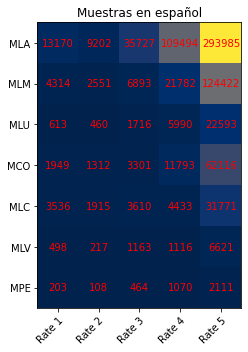

In [7]:
def plot_heatmap(matrix,countries,rates):

    fig, ax = plt.subplots(1,1,figsize=(len(countries),len(rates)))
    im = ax.imshow(matrix,cmap='cividis')

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(rates)))
    ax.set_yticks(np.arange(len(countries)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(['Rate {}'.format(s) for s in rates])
    ax.set_yticklabels(countries)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(countries)):
        for j in range(len(rates)):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="red")

    ax.set_title("Muestras en español")
    fig.tight_layout()
    return fig, ax

countries = ['MLA','MLM','MLU','MCO','MLC','MLV','MPE']
rates = [1, 2, 3, 4, 5]
matrix = np.zeros((len(countries),len(rates)),dtype=np.int)
for i,country in enumerate(countries):
    for j,rate in enumerate(rates):
        mymask = (df['review_rate'] == rate) & (df['country'] == country)
        matrix[i,j] = len(df[mymask])

fig, ax = plot_heatmap(matrix,countries,rates)
fig.show()

In [18]:
# Leo el archivo:
filename = './reviews_ven_parts_29-12-2020.csv'
df = pd.read_csv(filename)

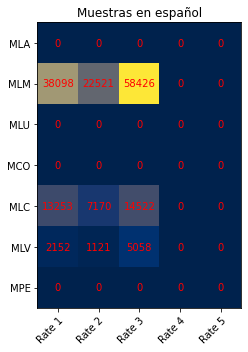

In [19]:
def plot_heatmap(matrix,countries,rates):

    fig, ax = plt.subplots(1,1,figsize=(len(countries),len(rates)))
    im = ax.imshow(matrix,cmap='cividis')

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(rates)))
    ax.set_yticks(np.arange(len(countries)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(['Rate {}'.format(s) for s in rates])
    ax.set_yticklabels(countries)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(countries)):
        for j in range(len(rates)):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="red")

    ax.set_title("Muestras en español")
    fig.tight_layout()
    return fig, ax

countries = ['MLA','MLM','MLU','MCO','MLC','MLV','MPE']
rates = [1, 2, 3, 4, 5]
matrix = np.zeros((len(countries),len(rates)),dtype=np.int)
for i,country in enumerate(countries):
    for j,rate in enumerate(rates):
        mymask = (df['review_rate'] == rate) & (df['country'] == country)
        matrix[i,j] = len(df[mymask])

fig, ax = plot_heatmap(matrix,countries,rates)
fig.show()

In [ ]:
# Leo el archivo:
filename = './reviews_ven_parts_29-12-2020.csv'
df = pd.read_csv(filename)


In [2]:
def filenames_generator(parts_directories):
    rs = np.random.RandomState(127361824)
    #                     '../29-mercado-libre-api-v3/peru_parts/'] 
    #                     '../29-mercado-libre-api-v3/ven_parts/']
    #parts_directories = ['../29-mercado-libre-api-v3/ven_parts/']
    
    for directory in parts_directories:
        print('Extracting from {}'.format(directory))
        list_parts = np.array(os.listdir(directory))
        num_parts = len(list_parts)
        for filename in rs.choice(list_parts,num_parts,replace=False):
            yield '{}{}'.format(directory,filename)

def get_csv(filenames_gen,filename):
    df = pd.concat([pd.read_csv(filename,lineterminator='\n',sep=',') \
        for filename in filenames_gen], ignore_index=True)

    # Elimino los duplicados y los que tienen valores faltantes:
    df = df.drop_duplicates(subset=['review_id'])\
        .reset_index(drop=True).dropna()

    assert df['prod_id'].apply(type).eq(str).all()
    assert df['cat_id'].apply(type).eq(str).all()
    assert df['review_id'].apply(type).eq(int).all()
    assert df['country'].isin(['MLB','MLA','MLM',
    'MLU','MCO','MLC','MLV','MPE']).all()
    assert df['prod_title'].apply(type).eq(str).all()
    assert df['reviewer_id'].apply(type).eq(int).all()
    assert df['review_date'].apply(type).eq(str).all()
    assert df['review_status'].apply(type).eq(str).all()
    df['review_title'] = df['review_title'].apply(str)
    assert df['review_title'].apply(type).eq(str).all()
    assert df['review_content'].apply(type).eq(str).all()
    assert df['review_rate'].isin([1, 2, 3, 4, 5]).all()
    assert df['review_likes'].apply(type).eq(int).all()
    assert df['review_dislikes'].apply(type).eq(int).all()

    print('Cantidad de reviews únicos descargados:',len(df))

    # Cambio todos los espacios por espacios simples 
    # y vuelvo a eliminar duplicados:
    df['review_content'] = df['review_content']\
        .str.replace(r'\s+',' ',regex=True)
    df['review_title'] = df['review_title'].str.replace(r'\s+',' ',regex=True)
    df = df.drop_duplicates(subset=['review_content',
                'review_title','review_rate']).reset_index(drop=True)
    print('Cantidad de reviews con contenido, título y rate únicos:',len(df))

    # Guardo en un csv los campos más importantes:
    df.to_csv(filename,index=False)
    print('Guardado OK.')



# df_read = pd.read_csv(filename)
# #assert df_read.equals(df_new)
# assert (df_read != df).sum().sum() == 0
# print('Terminó OK.')

In [5]:
filename = './reviews_orig_parts_04-01-2021.csv'
gen = filenames_generator(['./parts/', '../29-mercado-libre-api-v3/parts/'])
get_csv(gen,filename)

Extracting from ./parts/
Extracting from ../29-mercado-libre-api-v3/parts/
Cantidad de reviews únicos descargados: 7873145
Cantidad de reviews con contenido, título y rate únicos: 7311558
Guardado OK.


In [3]:
filename = './reviews_peru_parts_04-01-2021.csv'
gen = filenames_generator(['../29-mercado-libre-api-v3/peru_parts/'])
get_csv(gen,filename)

Extracting from ../29-mercado-libre-api-v3/peru_parts/
Cantidad de reviews únicos descargados: 677583
Cantidad de reviews con contenido, título y rate únicos: 653897
Guardado OK.


In [4]:
filename = './reviews_ven_parts_04-01-2021.csv'
gen = filenames_generator(['../29-mercado-libre-api-v3/ven_parts/'])
get_csv(gen,filename)


Extracting from ../29-mercado-libre-api-v3/ven_parts/
Cantidad de reviews únicos descargados: 163111
Cantidad de reviews con contenido, título y rate únicos: 162321
Guardado OK.


In [7]:
def merge_dfs(csvs_lists,filename):
    df = pd.concat([pd.read_csv(csv_filename,lineterminator='\n',sep=',') \
        for csv_filename in csvs_lists], ignore_index=True)

    # Elimino los duplicados y los que tienen valores faltantes:
    df = df.drop_duplicates(subset=['review_id'])\
        .reset_index(drop=True).dropna()

    assert df['prod_id'].apply(type).eq(str).all()
    assert df['cat_id'].apply(type).eq(str).all()
    assert df['review_id'].apply(type).eq(int).all()
    assert df['country'].isin(['MLB','MLA','MLM',
    'MLU','MCO','MLC','MLV','MPE']).all()
    assert df['prod_title'].apply(type).eq(str).all()
    assert df['reviewer_id'].apply(type).eq(int).all()
    assert df['review_date'].apply(type).eq(str).all()
    assert df['review_status'].apply(type).eq(str).all()
    df['review_title'] = df['review_title'].apply(str)
    assert df['review_title'].apply(type).eq(str).all()
    assert df['review_content'].apply(type).eq(str).all()
    assert df['review_rate'].isin([1, 2, 3, 4, 5]).all()
    assert df['review_likes'].apply(type).eq(int).all()
    assert df['review_dislikes'].apply(type).eq(int).all()

    print('Cantidad de reviews únicos descargados:',len(df))

    # Cambio todos los espacios por espacios simples 
    # y vuelvo a eliminar duplicados:
    df['review_content'] = df['review_content']\
        .str.replace(r'\s+',' ',regex=True)
    df['review_title'] = df['review_title'].str.replace(r'\s+',' ',regex=True)
    df = df.drop_duplicates(subset=['review_content',
                'review_title','review_rate']).reset_index(drop=True)
    print('Cantidad de reviews con contenido, título y rate únicos:',len(df))

    # Guardo en un csv los campos más importantes:
    df.to_csv(filename,index=False)
    print('Guardado OK.')

In [8]:
csvs_lists = ['./reviews_orig_parts_04-01-2021.csv', 
            './reviews_peru_parts_04-01-2021.csv',
            './reviews_ven_parts_04-01-2021.csv']
filename = './reviews_all_parts_04-01-2021.csv'
merge_dfs(csvs_lists,filename)

Cantidad de reviews únicos descargados: 7433979
Cantidad de reviews con contenido, título y rate únicos: 7426606
Guardado OK.


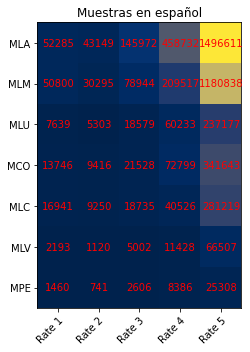

In [2]:
def plot_heatmap(matrix,countries,rates):

    fig, ax = plt.subplots(1,1,figsize=(len(countries),len(rates)))
    im = ax.imshow(matrix,cmap='cividis')

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(rates)))
    ax.set_yticks(np.arange(len(countries)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(['Rate {}'.format(s) for s in rates])
    ax.set_yticklabels(countries)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(countries)):
        for j in range(len(rates)):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="red")

    ax.set_title("Muestras en español")
    fig.tight_layout()
    return fig, ax

df = pd.read_csv('./reviews_all_parts_04-01-2021.csv',
                lineterminator='\n',sep=',')

countries = ['MLA','MLM','MLU','MCO','MLC','MLV','MPE']
rates = [1, 2, 3, 4, 5]
matrix = np.zeros((len(countries),len(rates)),dtype=np.int)
for i,country in enumerate(countries):
    for j,rate in enumerate(rates):
        mymask = (df['review_rate'] == rate) & (df['country'] == country)
        matrix[i,j] = len(df[mymask])

fig, ax = plot_heatmap(matrix,countries,rates)
fig.show()

## Exploramos MPE rate 2

In [3]:
mask = (df['review_rate'] == 2) & (df['country'] == 'MPE')
df_peru_rate2 = df[mask]

In [27]:
sys.path.append('../29-mercado-libre-api-v3/python-sdk/lib/')
from meli import Meli

cats_ids = df_peru_rate2['cat_id'].value_counts().index.tolist()
meli = Meli(client_id=1234, client_secret="a secret")
cats_results = meli.get('sites/MPE/categories/all').json()
categories = {}
for cat_id in cats_ids:
    try:
        categories[cat_id] = cats_results[cat_id]['path_from_root'][0]
    except KeyError:
        pass
len(categories)

380

In [21]:
mask = (df['review_rate'] == 2) & (df['country'] == 'MPE') & (df['cat_id'].isin(categories.keys()))
df_peru_rate2 = df[mask]
len(df_peru_rate2)

731

In [29]:
df_peru_rate2_cats = df_peru_rate2.copy()
df_peru_rate2_cats['cat_id'] = df_peru_rate2['cat_id'].apply(lambda cat: categories[cat]['name'])

In [44]:
ultimate_cats = {'Computación': 'Tecnología',
                'Hogar, Muebles y Jardín': 'Hogares y lugares de trabajo',
                'Belleza y Cuidado Personal': 'Salud y cuidado personal',
                'Celulares y Teléfonos': 'Tecnología',
                'Deportes y Fitness': 'Salud y cuidado personal',
                'Electrónica, Audio y Video': 'Tecnología',
                'Ropa y Accesorios': 'Salud y cuidado personal',
                'Accesorios para Vehículos': 'Tecnología',
                'Salud y Equipamiento Médico': 'Salud y cuidado personal',
                'Electrodomésticos': 'Hogares y lugares de trabajo',
                'Industrias y Oficinas': 'Hogares y lugares de trabajo',
                'Cámaras y Accesorios': 'Tecnología',
                'Herramientas y Construcción': 'Hogares y lugares de trabajo',
                'Instrumentos Musicales': 'Arte y entretenimiento',
                'Animales y Mascotas': 'Hogares y lugares de trabajo',
                'Bebés': 'Salud y cuidado personal',
                'Consolas y Videojuegos': 'Tecnología',
                'Otras categorías': None,
                'Servicios': 'Servicios',
                'Joyas y Relojes': 'Arte y entretenimiento',
                'Juegos y Juguetes': 'Arte y entretenimiento',
                'Libros, Revistas y Comics': 'Arte y entretenimiento',
                'Recuerdos, Cotillón y Fiestas': 'Arte y entretenimiento',
                'Alimentos y Bebidas': 'Alimentos',
                'Antigüedades y Colecciones': 'Arte y entretenimiento',
                'Arte, Librería y Mercería': 'Arte y entretenimiento',
                'Agro': None}

df_peru_rate2_cats['cat_id'] = df_peru_rate2['cat_id'].apply(lambda cat: ultimate_cats[categories[cat]['name']])
df_peru_rate2_cats['cat_id'].value_counts()

Tecnología                      287
Salud y cuidado personal        224
Hogares y lugares de trabajo    173
Arte y entretenimiento           30
Servicios                         6
Alimentos                         2
Name: cat_id, dtype: int64

Una vez separadas las categorías para todos los países, hay que hacer que, para cada país, haya una cantidad parecida de muestras en cada categoría para un rate fijo. Por ejemplo:

MPE:

    rate1: {cat1: x1, cat2: x2, ...}

    rate2: {cat2: x1, cat2: x2, ...}

MLA:

    rate1: {cat1: y1, cat2: y2, ...}
    
    rate2: {cat2: y1, cat2: y2, ...}

...

De esta manera, cuando sumás por país, hay la misma cantidad de muestras por categoría para cada rate.

## Inspección del resto de las categorías

In [3]:
sys.path.append('../29-mercado-libre-api-v3/python-sdk/lib/')
from meli import Meli

In [4]:
def get_category_name(df):
    countries = ['MLA','MLM','MLU','MCO','MLC','MLV','MPE','MLB']
    rates = [1, 2, 3, 4, 5]
    meli = Meli(client_id=1234, client_secret="a secret")

    categories_dict = {}
    for country in countries:
        categories_dict[country] = {}
        cats_results = meli.get('sites/{}/categories/all'.format(country)).json()
        for rate in rates:
            categories_dict[country][rate] = {}
            print('Country: {}. Rate: {}'.format(country,rate))
            mask = (df['review_rate'] == rate) & (df['country'] == country)
            df_country_rate = df[mask].reset_index(drop=True)
            
            cats_ids = df_country_rate['cat_id'].value_counts().index.tolist()
            for cat_id in cats_ids:
                try:
                    categories_dict[country][rate][cat_id] = cats_results[cat_id]['path_from_root'][0]['name']
                except KeyError:
                    categories_dict[country][rate][cat_id] = np.nan

    all_categories = {}
    for country in countries:
        for rate in rates:
            all_categories.update(categories_dict[country][rate])

    df['category'] = df['cat_id'].map(all_categories)
    return df.dropna().reset_index(drop=True)

df = get_category_name(df)

Country: MLA. Rate: 1
Country: MLA. Rate: 2
Country: MLA. Rate: 3
Country: MLA. Rate: 4
Country: MLA. Rate: 5
Country: MLM. Rate: 1
Country: MLM. Rate: 2
Country: MLM. Rate: 3
Country: MLM. Rate: 4
Country: MLM. Rate: 5
Country: MLU. Rate: 1
Country: MLU. Rate: 2
Country: MLU. Rate: 3
Country: MLU. Rate: 4
Country: MLU. Rate: 5
Country: MCO. Rate: 1
Country: MCO. Rate: 2
Country: MCO. Rate: 3
Country: MCO. Rate: 4
Country: MCO. Rate: 5
Country: MLC. Rate: 1
Country: MLC. Rate: 2
Country: MLC. Rate: 3
Country: MLC. Rate: 4
Country: MLC. Rate: 5
Country: MLV. Rate: 1
Country: MLV. Rate: 2
Country: MLV. Rate: 3
Country: MLV. Rate: 4
Country: MLV. Rate: 5
Country: MPE. Rate: 1
Country: MPE. Rate: 2
Country: MPE. Rate: 3
Country: MPE. Rate: 4
Country: MPE. Rate: 5
Country: MLB. Rate: 1
Country: MLB. Rate: 2
Country: MLB. Rate: 3
Country: MLB. Rate: 4
Country: MLB. Rate: 5


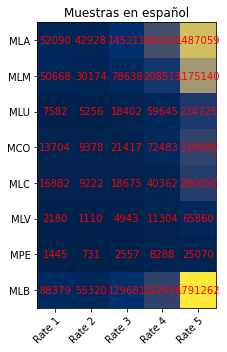

In [8]:
countries = ['MLA','MLM','MLU','MCO','MLC','MLV','MPE','MLB']
rates = [1, 2, 3, 4, 5]
matrix = np.zeros((len(countries),len(rates)),dtype=np.int)
for i,country in enumerate(countries):
    for j,rate in enumerate(rates):
        mymask = (df['review_rate'] == rate) & (df['country'] == country)
        matrix[i,j] = len(df[mymask])

fig, ax = plot_heatmap(matrix,countries,rates)
fig.show()

In [9]:
#df.to_csv('./reviews_all_parts_with_orig_cat_name_04-01-2021.csv',index=False)

## Empezar desde acá si ya se tienen los nombres originales de las categorías

In [2]:
filename = './reviews_all_parts_with_orig_cat_name_04-01-2021.csv'
df = pd.read_csv(filename,lineterminator='\n',sep=',')
df

prod_id     cat_id  review_id country  \
0        MLB997757281  MLB194804   45171176     MLB   
1        MLB997757281  MLB194804   29967536     MLB   
2        MLB997757281  MLB194804   43241475     MLB   
3        MLB997757281  MLB194804   37865476     MLB   
4        MLB997757281  MLB194804   67942945     MLB   
...               ...        ...        ...     ...   
7385254  MLM667425581   MLM10217   87690135     MLM   
7385255  MLM686769935   MLM10217   75540542     MLM   
7385256  MLM686769935   MLM10217   76742909     MLM   
7385257  MLM737899216   MLM10217   90081311     MLM   
7385258  MLM784750684   MLM10217   90497240     MLM   

                                                prod_title  reviewer_id  \
0        Retentor Caixa Direção Hidráulica Trw Vw Gol P...     34639113   
1        Retentor Caixa Direção Hidráulica Trw Vw Gol P...     44293618   
2        Retentor Caixa Direção Hidráulica Trw Vw Gol P...    190476271   
3        Retentor Caixa Direção Hidráulica Trw Vw Gol P...     63696079   
4        Retentor Caixa Direção Hidráulica Trw Vw Gol P...     16878537   
...                                                    ...          ...   
7385254  Masajeador Electrico Doble Cabeza Infrarojo Nu...     86220746   
7385255  Masajeador C/infrarrojo Body Innovation Celuli...     76924209   
7385256  Masajeador C/infrarrojo Body Innovation Celuli...    567795556   
7385257  Pistola Eléctrica Masajeadora De Tejidos, Reca...    139045157   
7385258  Rodillo De Masajes Y Piedra Raspadora Gua Sha ...     51858396   

                           review_date review_status  \
0        2019-08-31T06:32:48.000-04:00     published   
1        2018-06-27T13:44:14.000-04:00     published   
2        2019-07-21T09:39:11.000-04:00     published   
3        2019-01-16T20:13:10.000-04:00     published   
4        2020-06-30T05:42:33.000-04:00     published   
...                                ...           ...   
7385254  2020-12-04T10:34:41.000-04:00     published   
7385255  2020-08-22T03:20:48.000-04:00     published   
7385256  2020-08-31T11:44:33.000-04:00     published   
7385257  2020-12-24T12:27:53.000-04:00     published   
7385258  2020-12-28T14:26:56.000-04:00     published   

                                       review_title  \
0                                         Excelente   
1                                   otima qualidade   
2                                         Excelente   
3                                     otimo produto   
4                                         Excelente   
...                                             ...   
7385254  Ya no enciende Ni 30 dia Duro funcionando    
7385255                     Regular tirando a malo.   
7385256                                        Mala   
7385257                         PRODUCTO NO DESEADO   
7385258                           Muy baja calidad.   

                                            review_content  review_rate  \
0        Excelente produto vedou certinho , recomendo r...            5   
1        Muito bom atende aos vazamentos interno da caixa.            5   
2                    Bom, a princípio resolveu o problema.            5   
3                          Tudo certo ! recomendo a todos.            5   
4             Muito bom o produto é bem o que eu esperava.            5   
...                                                    ...          ...   
7385254                    No duro 30 dias ya no enciende.            1   
7385255  No es de buena calidad, los focos rojos se sup...            1   
7385256  Mal producto apenas tenia un mes exacto y dejo...            1   
7385257  Solo dan 3 meses de garantia, fallo al cuarto ...            1   
7385258                    Se despegó en la primera usada.            1   

         review_likes  review_dislikes                     category  
0                   2                0     Acessórios para Veículos  
1                   1                0     Acessórios para Veículos  
2      

In [4]:
# Elimino los duplicados y los que tienen valores faltantes:
df = df.drop_duplicates(subset=['review_id'])\
    .reset_index(drop=True).dropna()

assert df['prod_id'].apply(type).eq(str).all()
assert df['cat_id'].apply(type).eq(str).all()
assert df['review_id'].apply(type).eq(int).all()
assert df['country'].isin(['MLB','MLA','MLM',
'MLU','MCO','MLC','MLV','MPE']).all()
assert df['prod_title'].apply(type).eq(str).all()
assert df['reviewer_id'].apply(type).eq(int).all()
assert df['review_date'].apply(type).eq(str).all()
assert df['review_status'].apply(type).eq(str).all()
df['review_title'] = df['review_title'].apply(str)
assert df['review_title'].apply(type).eq(str).all()
assert df['review_content'].apply(type).eq(str).all()
assert df['review_rate'].isin([1, 2, 3, 4, 5]).all()
assert df['review_likes'].apply(type).eq(int).all()
assert df['review_dislikes'].apply(type).eq(int).all()

print('Cantidad de reviews únicos descargados:',len(df))

# Cambio todos los espacios por espacios simples 
# y vuelvo a eliminar duplicados:
df['review_content'] = df['review_content']\
    .str.replace(r'\s+',' ',regex=True)
df['review_title'] = df['review_title'].str.replace(r'\s+',' ',regex=True)
df = df.drop_duplicates(subset=['review_content',
            'review_title','review_rate']).reset_index(drop=True)
print('Cantidad de reviews con contenido, título y rate únicos:',len(df))

Cantidad de reviews únicos descargados: 7385259
Cantidad de reviews con contenido, título y rate únicos: 7385259


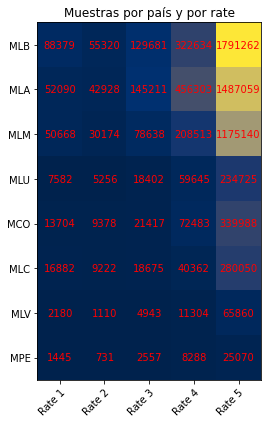

In [3]:
def plot_heatmap(matrix,countries,rates):

    fig, ax = plt.subplots(1,1,figsize=(len(countries),len(rates)+1))
    im = ax.imshow(matrix,cmap='cividis')

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(rates)))
    ax.set_yticks(np.arange(len(countries)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(['Rate {}'.format(s) for s in rates])
    ax.set_yticklabels(countries)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(countries)):
        for j in range(len(rates)):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="red")

    ax.set_title("Muestras por país y por rate")
    fig.tight_layout()
    return fig, ax

countries = ['MLB','MLA','MLM','MLU','MCO','MLC','MLV','MPE']
rates = [1, 2, 3, 4, 5]
matrix = np.zeros((len(countries),len(rates)),dtype=np.int)
for i,country in enumerate(countries):
    for j,rate in enumerate(rates):
        mymask = (df['review_rate'] == rate) & (df['country'] == country)
        matrix[i,j] = len(df[mymask])

fig, ax = plot_heatmap(matrix,countries,rates)
fig.show()

In [3]:
# Se ejecutó --> dict(df['category'].value_counts())
# Se obtuvo el diccionario de ocurrencias de las categorías.
# Se usa eso para generar un conversor de categorías menos específico:

generalize_categories = {'Hogar, Muebles y Jardín': 'Hogar / Casa',
'Casa, Móveis e Decoração': 'Hogar / Casa',
'Herramientas y Construcción': 'Hogar / Casa',
'Industrias y Oficinas': 'Hogar / Casa',
'Ferramentas e Construção': 'Hogar / Casa',
'Bebés': 'Hogar / Casa',
'Animales y Mascotas': 'Hogar / Casa',
'Hogar y Muebles': 'Hogar / Casa',
'Bebês': 'Hogar / Casa',
'Animais': 'Hogar / Casa',
'Indústria e Comércio': 'Hogar / Casa',
'Industrias': 'Hogar / Casa',

'Computación': 'Tecnología y electrónica / Tecnologia e electronica',
'Accesorios para Vehículos': 'Tecnología y electrónica / Tecnologia e electronica',
'Acessórios para Veículos': 'Tecnología y electrónica / Tecnologia e electronica',
'Electrónica, Audio y Video': 'Tecnología y electrónica / Tecnologia e electronica',
'Electrodomésticos y Aires Ac.': 'Tecnología y electrónica / Tecnologia e electronica',
'Celulares y Telefonía': 'Tecnología y electrónica / Tecnologia e electronica',
'Informática': 'Tecnología y electrónica / Tecnologia e electronica',
'Eletrônicos, Áudio e Vídeo': 'Tecnología y electrónica / Tecnologia e electronica',
'Electrodomésticos': 'Tecnología y electrónica / Tecnologia e electronica',
'Eletrodomésticos': 'Tecnología y electrónica / Tecnologia e electronica',
'Celulares y Teléfonos': 'Tecnología y electrónica / Tecnologia e electronica',
'Cámaras y Accesorios': 'Tecnología y electrónica / Tecnologia e electronica',
'Consolas y Videojuegos': 'Tecnología y electrónica / Tecnologia e electronica',
'Celulares e Telefones': 'Tecnología y electrónica / Tecnologia e electronica',
'Câmeras e Acessórios': 'Tecnología y electrónica / Tecnologia e electronica',

'Deportes y Fitness': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',
'Belleza y Cuidado Personal': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',  
'Calçados, Roupas e Bolsas': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',
'Esportes e Fitness': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',
'Ropa y Accesorios': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',
'Salud y Equipamiento Médico': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',
'Beleza e Cuidado Pessoal': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',
'Ropa, Bolsas y Calzado': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',
'Saúde': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',
'Vestuario y Calzado': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',
'Ropa, Calzados y Accesorios': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',
'Ropa, Zapatos y Accesorios': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',
'Estética y Belleza': 'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',

'Juegos y Juguetes': 'Arte y entretenimiento / Arte e Entretenimiento',
'Brinquedos e Hobbies': 'Arte y entretenimiento / Arte e Entretenimiento',
'Arte, Librería y Mercería': 'Arte y entretenimiento / Arte e Entretenimiento',
'Instrumentos Musicales': 'Arte y entretenimiento / Arte e Entretenimiento',
'Arte, Papelaria e Armarinho': 'Arte y entretenimiento / Arte e Entretenimiento',
'Arte, Papelería y Mercería': 'Arte y entretenimiento / Arte e Entretenimiento',
'Joyas y Relojes': 'Arte y entretenimiento / Arte e Entretenimiento',
'Instrumentos Musicais': 'Arte y entretenimiento / Arte e Entretenimiento',
'Games': 'Arte y entretenimiento / Arte e Entretenimiento',
'Joias e Relógios': 'Arte y entretenimiento / Arte e Entretenimiento',
'Souvenirs, Cotillón y Fiestas': 'Arte y entretenimiento / Arte e Entretenimiento',
'Festas e Lembrancinhas': 'Arte y entretenimiento / Arte e Entretenimiento',
'Recuerdos, Cotillón y Fiestas': 'Arte y entretenimiento / Arte e Entretenimiento',
'Antigüedades y Colecciones': 'Arte y entretenimiento / Arte e Entretenimiento',
'Libros, Revistas y Comics': 'Arte y entretenimiento / Arte e Entretenimiento',
'Relojes y Joyas': 'Arte y entretenimiento / Arte e Entretenimiento',
'Antiguidades e Coleções': 'Arte y entretenimiento / Arte e Entretenimiento',
'Arte, Librería y Cordonería': 'Arte y entretenimiento / Arte e Entretenimiento',
'Recuerdos, Piñatería y Fiestas': 'Arte y entretenimiento / Arte e Entretenimiento',
'Música, Películas y Series': 'Arte y entretenimiento / Arte e Entretenimiento',
'Música, Filmes e Seriados': 'Arte y entretenimiento / Arte e Entretenimiento',
'Relojes, Joyas y Bisutería': 'Arte y entretenimiento / Arte e Entretenimiento',
'Música y Películas': 'Arte y entretenimiento / Arte e Entretenimiento',
'Livros, Revistas e Comics': 'Arte y entretenimiento / Arte e Entretenimiento',

'Alimentos y Bebidas': 'Alimentos y Bebidas / Alimentos e Bebidas',
'Alimentos e Bebidas': 'Alimentos y Bebidas / Alimentos e Bebidas',

'Servicios': 'Servicios / Serviços',
'Serviços': 'Servicios / Serviços',

'Agro': np.nan,
'Otras categorías': np.nan,
'Mais Categorias': np.nan,
'Otras Categorías': np.nan,
'Ingressos': np.nan,
'Entradas para Eventos': np.nan,
'Boletas para Espectáculos': np.nan,
'Autos, Motos y Otros': np.nan}

gen2key = {'Hogar / Casa': 'HOGAR',
'Tecnología y electrónica / Tecnologia e electronica': 'TEC',
'Arte y entretenimiento / Arte e Entretenimiento': 'ARTE',
'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal': 'SALUD',
'Alimentos y Bebidas / Alimentos e Bebidas': 'ALIMENTOS',
'Servicios / Serviços': 'SEVICIOS'}

In [4]:
df['category'] = df['category'].map(generalize_categories)
df = df.dropna().reset_index(drop=True)
df['category'][(df['country'] == 'MPE') & (df['review_rate'] == 2)]

61131      Tecnología y electrónica / Tecnologia e electr...
99578                                           Hogar / Casa
99601                                           Hogar / Casa
99609                                           Hogar / Casa
99614                                           Hogar / Casa
                                 ...                        
7280659    Tecnología y electrónica / Tecnologia e electr...
7280660    Tecnología y electrónica / Tecnologia e electr...
7280959    Salud, ropa y cuidado personal / Saúde, roupas...
7281591                                         Hogar / Casa
7281592                                         Hogar / Casa
Name: category, Length: 722, dtype: object

MLB
MLA
MLM
MLU
MCO
MLC
MLV
MPE


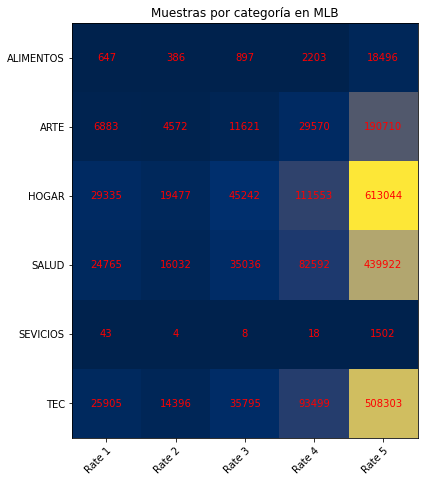

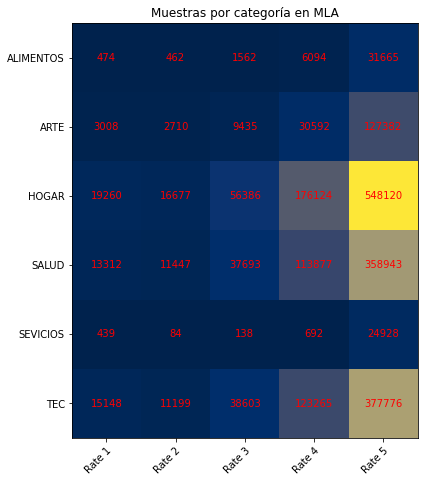

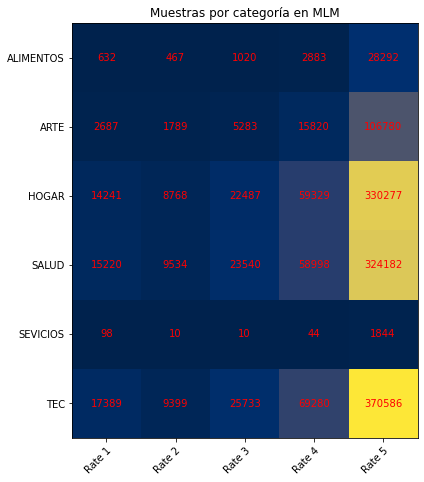

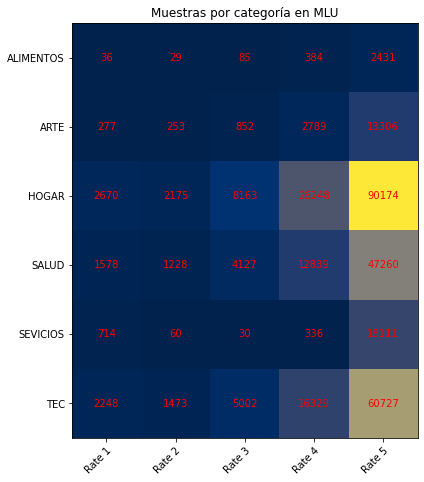

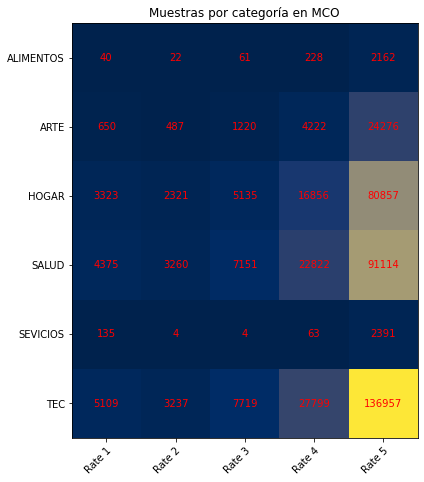

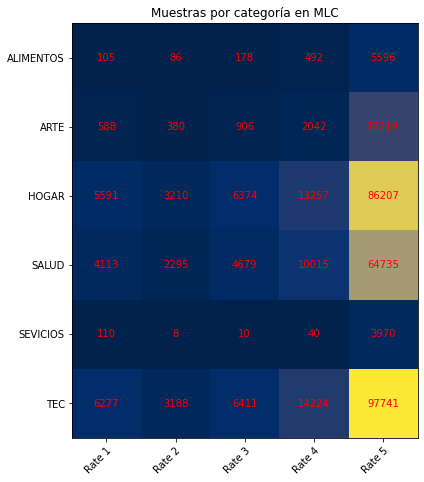

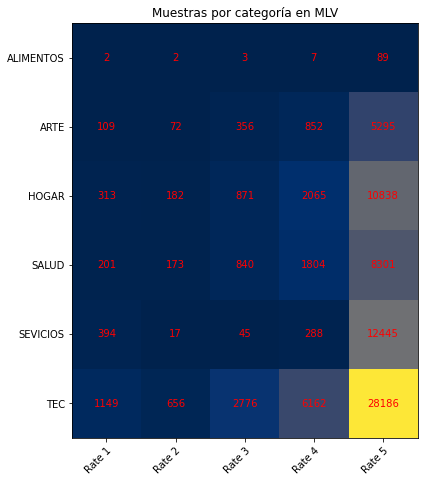

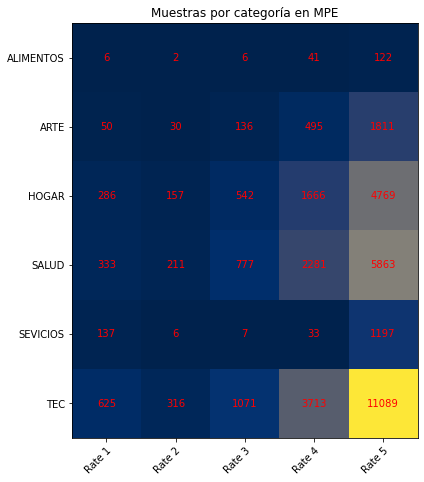

In [6]:
def plot_heatmap2(matrix,yticks,xticks,title):

    fig, ax = plt.subplots(1,1,figsize=(len(yticks),len(xticks)*2))
    im = ax.imshow(matrix,cmap='cividis')

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(xticks)))
    ax.set_yticks(np.arange(len(yticks)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(['Rate {}'.format(s) for s in xticks])
    ax.set_yticklabels(yticks)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(yticks)):
        for j in range(len(xticks)):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="red")

    ax.set_title(title)
    fig.tight_layout()
    return fig, ax

countries = ['MLB','MLA','MLM','MLU','MCO','MLC','MLV','MPE']
rates = [1, 2, 3, 4, 5]
categories = sorted(list(set(generalize_categories.values()) - {np.nan}))
keys = [gen2key[gen] for gen in categories]

for country in countries:
    print(country)
    matrix = np.zeros((len(categories),len(rates)),dtype=np.int)
    for i,category in enumerate(categories):
        for j,rate in enumerate(rates):
            mymask = (df['review_rate'] == rate) & (df['category'] == category) & (df['country'] == country)
            matrix[i,j] = mymask.sum()

    fig, ax = plot_heatmap2(matrix,keys,rates,title='Muestras por categoría en {}'.format(country))
    fig.show()

Como yo no quiero que los algoritmos predigan el rate a partir del vocabulario (es decir, no quiero que se prediga que es rate 5 sólo porque la mayor parte de los reviews de tecnología son de rate 5), voy a querer que la cantidad de reviews por tema sean más o menos equilibrados a lo largo de los rates.

En el test yo quiero 700 muestras por país y por rate. Eso me da 24500 muestras en total, lo cual está bien para un conjunto de test. El resto lo puedo usar para train, pero tengo que lograr, tanto para train como para test, que haya la misma cantidad de reviews por categoría por rate. Es decir, puede haber 2 reviews en la categoría SERVICIOS en Perú rateados con 2 estrellas, pero también tiene que haber 2 reviews en la misma categoría rateados con 1, 3, 4 y 5 estrellas. Eso me da, si dejo 24500 muestras para test, un total de aproximadamente 90000 muestras para train, ya que en train no es necesario tener igualado por país la cantidad de reviews.

In [7]:
len(df)

7306825

In [5]:
# df = df.loc[:,['prod_id','category','country','prod_title','reviewer_id','review_title','review_content','review_rate','review_likes','review_dislikes']]
df.to_csv('./reviews_all_parts_with_cats_ok_06-01-2021.csv',index=False)

## Empezar desde acá si ya se limpiaron las categorías totalmente

In [3]:
df = pd.read_csv('./reviews_all_parts_with_cats_ok_06-01-2021.csv',lineterminator='\n',sep=',')

# Elimino los duplicados y los que tienen valores faltantes:
df = df.drop_duplicates(subset=['review_id'])\
    .reset_index(drop=True).dropna()

assert df['prod_id'].apply(type).eq(str).all()
assert df['review_id'].apply(type).eq(int).all()
assert df['country'].isin(['MLB','MLA','MLM',
'MLU','MCO','MLC','MLV','MPE']).all()
assert df['prod_title'].apply(type).eq(str).all()
assert df['reviewer_id'].apply(type).eq(int).all()
df['review_title'] = df['review_title'].apply(str)
assert df['review_title'].apply(type).eq(str).all()
assert df['review_content'].apply(type).eq(str).all()
assert df['review_rate'].isin([1, 2, 3, 4, 5]).all()
assert df['review_likes'].apply(type).eq(int).all()
assert df['review_dislikes'].apply(type).eq(int).all()

print('Cantidad de reviews únicos descargados:',len(df))

# Cambio todos los espacios por espacios simples 
# y vuelvo a eliminar duplicados:
df['review_content'] = df['review_content']\
    .str.replace(r'\s+',' ',regex=True)
df['review_title'] = df['review_title'].str.replace(r'\s+',' ',regex=True)
df = df.drop_duplicates(subset=['review_content',
            'review_title','review_rate']).reset_index(drop=True)
print('Cantidad de reviews con contenido, título y rate únicos:',len(df))

Cantidad de reviews únicos descargados: 7306825
Cantidad de reviews con contenido, título y rate únicos: 7306825


MLB
MLA
MLM
MLU
MCO
MLC
MLV
MPE


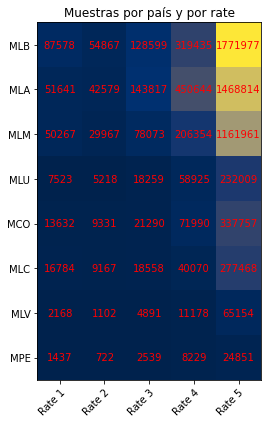

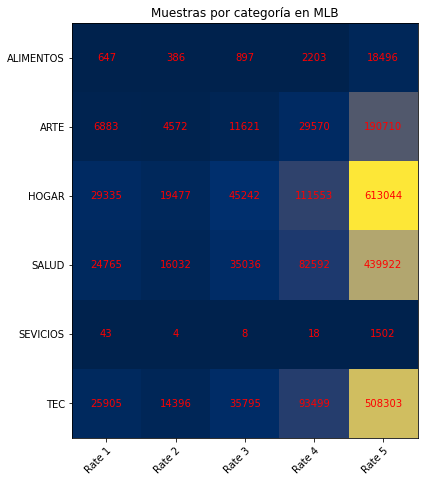

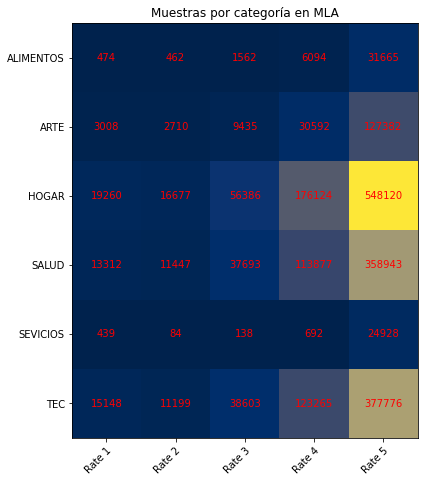

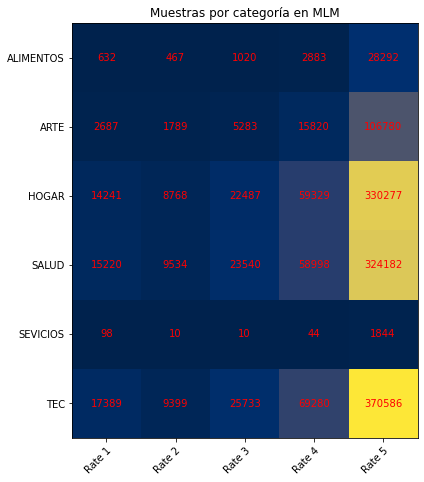

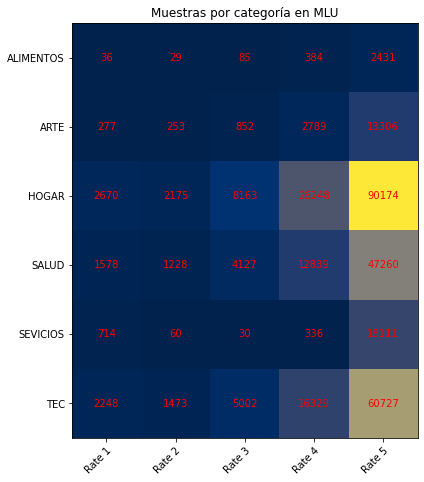

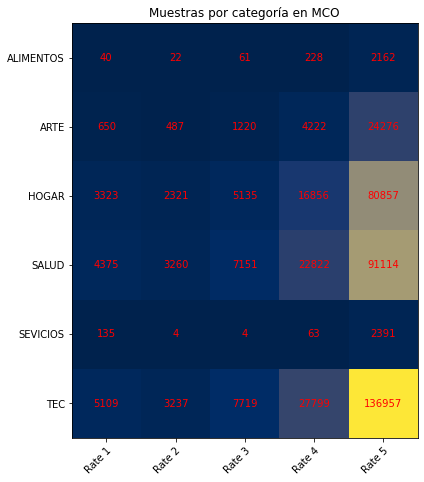

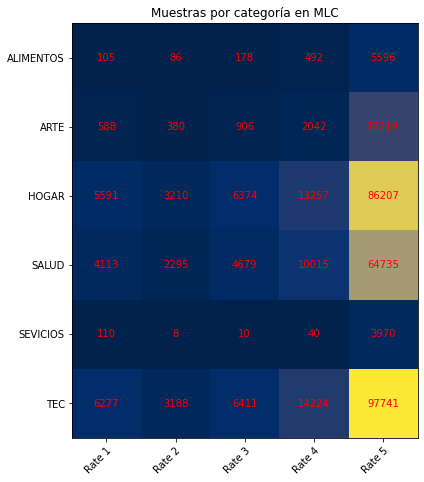

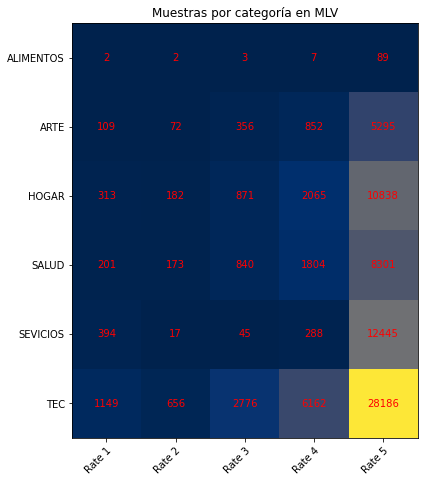

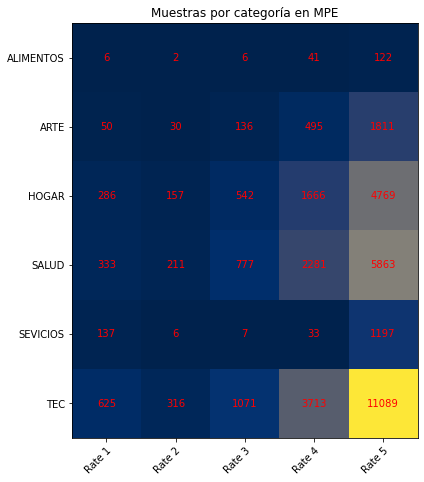

In [4]:
def plot_heatmap(matrix,countries,rates):

    fig, ax = plt.subplots(1,1,figsize=(len(countries),len(rates)+1))
    im = ax.imshow(matrix,cmap='cividis')

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(rates)))
    ax.set_yticks(np.arange(len(countries)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(['Rate {}'.format(s) for s in rates])
    ax.set_yticklabels(countries)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(countries)):
        for j in range(len(rates)):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="red")

    ax.set_title("Muestras por país y por rate")
    fig.tight_layout()
    return fig, ax

countries = ['MLB','MLA','MLM','MLU','MCO','MLC','MLV','MPE']
rates = [1, 2, 3, 4, 5]
matrix = np.zeros((len(countries),len(rates)),dtype=np.int)
for i,country in enumerate(countries):
    for j,rate in enumerate(rates):
        mymask = (df['review_rate'] == rate) & (df['country'] == country)
        matrix[i,j] = len(df[mymask])

fig, ax = plot_heatmap(matrix,countries,rates)
fig.show()


def plot_heatmap2(matrix,yticks,xticks,title):

    fig, ax = plt.subplots(1,1,figsize=(len(yticks),len(xticks)*2))
    im = ax.imshow(matrix,cmap='cividis')

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(xticks)))
    ax.set_yticks(np.arange(len(yticks)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(['Rate {}'.format(s) for s in xticks])
    ax.set_yticklabels(yticks)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(yticks)):
        for j in range(len(xticks)):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="red")

    ax.set_title(title)
    fig.tight_layout()
    return fig, ax

abbreviations = {'Hogar / Casa': 'HOGAR',
'Tecnología y electrónica / Tecnologia e electronica': 'TEC',
'Arte y entretenimiento / Arte e Entretenimiento': 'ARTE',
'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal': 'SALUD',
'Alimentos y Bebidas / Alimentos e Bebidas': 'ALIMENTOS',
'Servicios / Serviços': 'SEVICIOS'}

categories = sorted(list(abbreviations.keys()))
abbs = [abbreviations[cat] for cat in categories]

for country in countries:
    print(country)
    matrix = np.zeros((len(categories),len(rates)),dtype=np.int)
    for i,category in enumerate(categories):
        for j,rate in enumerate(rates):
            mymask = (df['review_rate'] == rate) & (df['category'] == category) & (df['country'] == country)
            matrix[i,j] = mymask.sum()

    fig, ax = plot_heatmap2(matrix,abbs,rates,title='Muestras por categoría en {}'.format(country))
    fig.show()
    

## Vamos a empezar a recortar reviews para emparejar las clases

Lo anterior es para visualizar. Ahora se puede empezar directamente por acá.

In [1]:
import pandas as pd
import numpy as np
import re
import string

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./reviews_all_parts_with_cats_ok_06-01-2021.csv',lineterminator='\n',sep=',')

abbreviations = {'Hogar / Casa': 'HOGAR',
'Tecnología y electrónica / Tecnologia e electronica': 'TEC',
'Arte y entretenimiento / Arte e Entretenimiento': 'ARTE',
'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal': 'SALUD',
'Alimentos y Bebidas / Alimentos e Bebidas': 'ALIMENTOS',
'Servicios / Serviços': 'SEVICIOS'}

df['category'] = df['category'].map(abbreviations)

In [3]:
print(df['review_rate'][df['country'] == 'MLB'].value_counts())
print(df['review_rate'][df['country'] != 'MLB'].value_counts())

5    1771977
4     319435
3     128599
1      87578
2      54867
Name: review_rate, dtype: int64
5    3568014
4     847390
3     287427
1     143452
2      98086
Name: review_rate, dtype: int64


len: 11089. max: 810. min: 3

Los audífonos superaron toda expectativa que tenía. Todavía no los cargo y ya lleva mas se 10 hras de uso. Respecto a quien me atendió fue increíble. Se comunicó muy rapido e incluso me trajo los audífonos a 3 cuadras de mi casa, lo cual me dejo muy tranquilo porque ya quería usarlos. Los bajos de los crusher son increíbles para escuchar música y las películas de acción son una locura parece que estás en un cine. Es la mejor opción!. 0.9732736300164766 0.5092105263157894

El piso de jebe es bueno, pero me gustaría que tengan otro de mejor calidad, cosa que hay de 2 precios, para escoger. Pero es un excelente producto. 0.9635748131112326 0.12894736842105264

Estupendo producto. Muy necesario en el lavavajillas. Es el más económico en el mercado. La vajilla ya no sale con manchas de sarro. Una carga en mi lavavajillas dura de dos a 4 meses. Por favor no ingerir, es solo para uso dentro de la máquina, no es para comer. 0.9660406953349069 0.2802631578947368

E

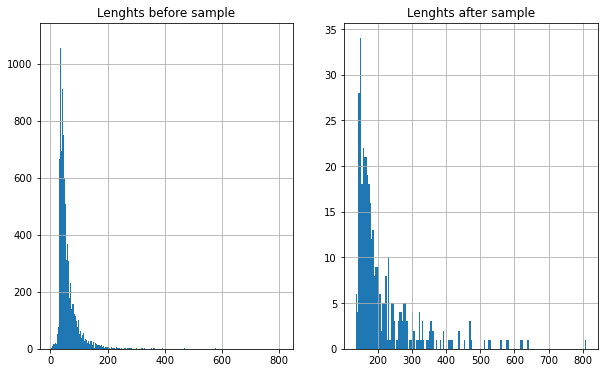

In [60]:

def mask(df,ctry,cat,rate):
    return ((df['country'] == ctry) & (df['category'] == cat) & (df['review_rate'] == rate))

def sample(df_new,n):
    #df_new['valorization'] = df_new['review_likes'] + df_new['review_dislikes']
    #df_new['lenght'] = df_new['review_content'].str.len()
    #df_new = df_new.sort_values(by=['valorization','lenght'],ascending=[False,False])
    #return df_new.iloc[:n,:].loc[:,['review_title','review_content','valorization','lenght','prod_id']]
    diff = df_new['review_likes'] - df_new['review_dislikes']
    vals = np.log(diff - diff.min() + 1)
    vals_norm = (vals - vals.min()) / (vals.max()-vals.min())
    lenghts = np.maximum(0,df_new['review_content'].str.len()-50)
    lenghts_norm = (lenghts - lenghts.min()) / (lenghts.max() - lenghts.min())
    df_new['score'] = vals_norm + .5 * lenghts_norm
    #df_new['score'] = np.log(vals+1) + np.maximum(0,lenghts-100)
    df_new['valorization'] = vals_norm
    df_new['lenght'] = lenghts_norm
    df_new = df_new.sort_values(by=['score'],ascending=False)
    return df_new.iloc[:n,:].loc[:,['review_title','review_content','valorization','lenght','prod_id']]


def show_sample(df,df_new,n):
    fig, ax = plt.subplots(1,2,figsize=(10,6))

    lenghts = df_new['review_content'].str.len()
    print('len: {}. max: {}. min: {}'.format(len(lenghts),max(lenghts),min(lenghts)))
    print()
    lenghts.hist(bins=len(lenghts.value_counts()),ax=ax[0])
    ax[0].set_title('Lenghts before sample')

    df_new = sample(df_new,n)

    for _ , (_, comment, valorization, lenght, _) in df_new.sample(frac=.02).iterrows():
        print(comment, valorization, lenght)
        print()

    lenghts = df_new['review_content'].str.len()
    print('len: {}. max: {}. min: {}'.format(len(lenghts),max(lenghts),min(lenghts)))
    print()
    lenghts.hist(bins=len(lenghts.value_counts()),ax=ax[1])
    ax[1].set_title('Lenghts after sample')

    prods = df_new['prod_id']
    print('prods ids:')
    print(prods.value_counts())
    print()

    fig.show()

    return df.loc[df_new.index,:]


df_new = df[mask(df,'MPE','TEC',5)]
df_new = show_sample(df,df_new,400)

<AxesSubplot:>

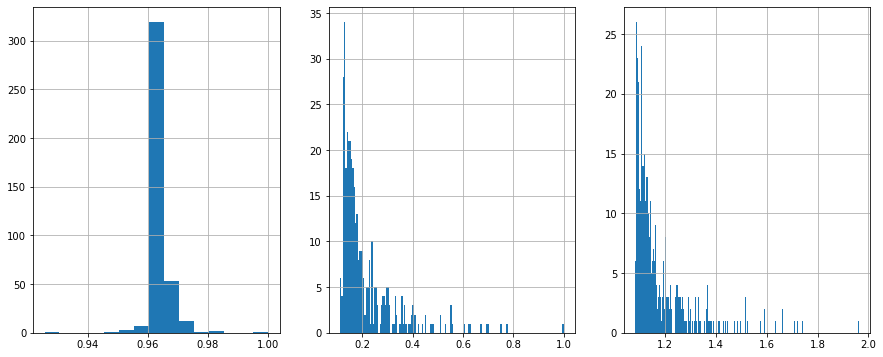

In [55]:
df_new = df[mask(df,'MPE','TEC',5)]
df2_new = sample(df_new,400)

fig, ax = plt.subplots(1,3,figsize=(15,6))
#vals = np.log(df2_new['valorization']+1)
vals = df2_new['valorization']
vals.hist(bins=len(vals.value_counts()),ax=ax[0])
#lenghts = np.maximum(100,df2_new['lenght'])
lenghts = df2_new['lenght']
lenghts.hist(bins=len(lenghts.value_counts()),ax=ax[1])
score = lenghts + vals
score.hist(bins=len(score.value_counts()),ax=ax[2])

País: MLA

Rate: 1

len: 15148. max: 1498. min: 3

Muy mala calidad y compré un par y la base de los faros eran diferentes tuve que modificarlos. 0.8633088120831599 0.03038674033149171

El sistema vino con una falla que no me lo toma la impresora, además vino con tinta derramada. Llamo y no me atiende nadie. No tengo solución aun. 0.8603965649941441 0.06629834254143646

Lo único bien es la luz, le puse una lámpara led philips 220v 85 w el ventilador es berreton y que tenga rulemanes skf es para mí, otra mentira. 0.8603965649941441 0.0649171270718232

El vidrio viene manchaso en la parte del pegamento que va adherido a la pantalla por tal motivo lo tuve que sacar y tirarlo xq se veia sucia la pantalla ,gaste casi 800 pesos para terminar tirandolo a la basura. 0.8603965649941441 0.1111878453038674

Maso menos por qué cuando le ise una limpieza de cabezales a la impresora me marca q ya no tenía tinta en ningún cartucho. 0.8603965649941441 0.049723756906077346

La punta que le correspondía

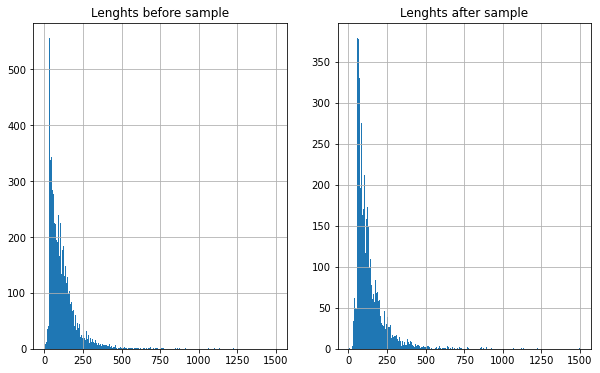

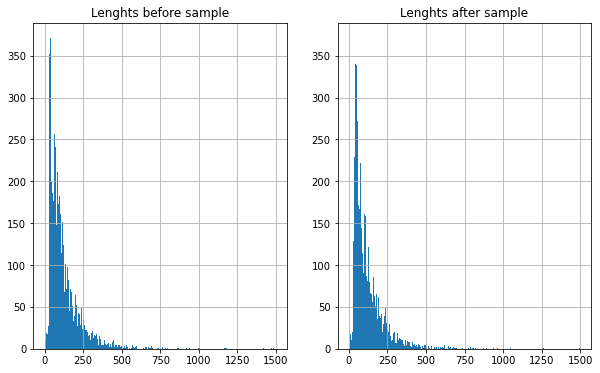

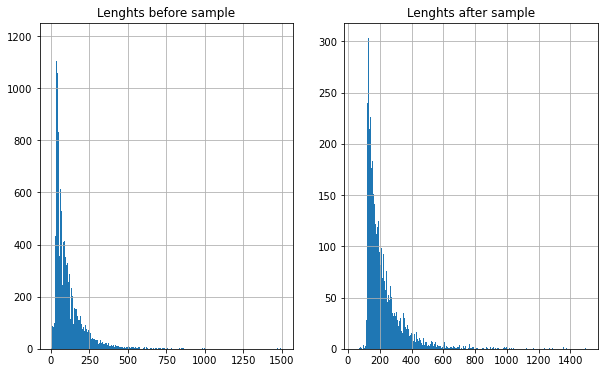

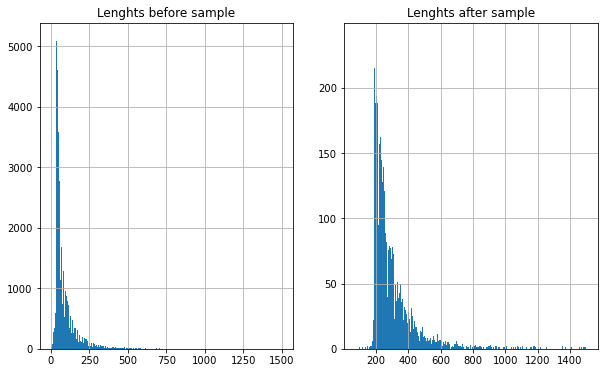

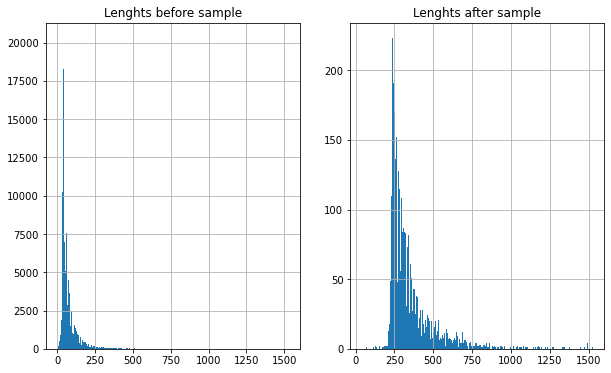

In [61]:
countries = ['MLB','MLA','MLM','MLU','MCO','MLC','MLV','MPE']
rates = [1, 2, 3, 4, 5]
n = [14396,11199,9399,1473,3237,3188,656,316]

i = 1
print('País:',countries[i])
print()
for rate in rates:
    print('Rate:',rate)
    print()
    df_new = df[mask(df,countries[i],'TEC',rate)]
    df_new = show_sample(df,df_new,n[i])


Ahora sí: a samplear de verdad

In [1]:
import pandas as pd
import numpy as np
import re
import string

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./reviews_all_parts_with_cats_ok_06-01-2021.csv',lineterminator='\n',sep=',')

abbreviations = {'Hogar / Casa': 'HOGAR',
'Tecnología y electrónica / Tecnologia e electronica': 'TEC',
'Arte y entretenimiento / Arte e Entretenimiento': 'ARTE',
'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal': 'SALUD',
'Alimentos y Bebidas / Alimentos e Bebidas': 'ALIMENTOS',
'Servicios / Serviços': 'SERVICIOS'}

df['category'] = df['category'].map(abbreviations)

In [3]:
def sort_by_score(df):
    score_map = {2:1., 1:.75, 3:.5, 4:.25, 5:0.}
    df['rate_score'] = df['review_rate'].map(score_map)
    diff = df['review_likes'] - df['review_dislikes']
    vals = np.log(diff - diff.min() + 1)
    vals_norm = (vals - vals.min()) / (vals.max()-vals.min())
    lenghts = np.maximum(0,df['review_content'].str.len()-50)
    lenghts_norm = (lenghts - lenghts.min()) / (lenghts.max() - lenghts.min())
    df['val_score'] = vals_norm + .5 * lenghts_norm
    df = df.sort_values(by=['rate_score','val_score'],ascending=[False,False])
    return df.drop(['rate_score','val_score'], axis=1)

df = sort_by_score(df)
df = df.groupby(['prod_id']).head(30)
df = df.reset_index(drop=True)

MLB
MLA
MLM
MLU
MCO
MLC
MLV
MPE


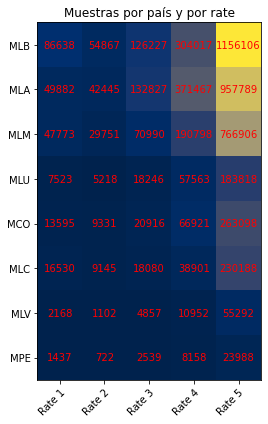

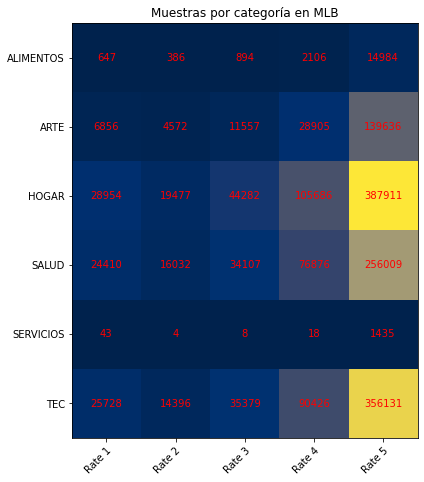

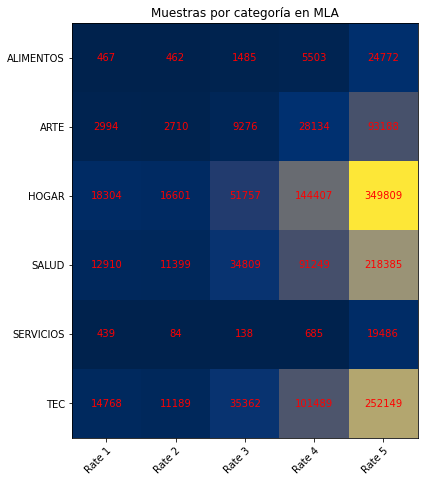

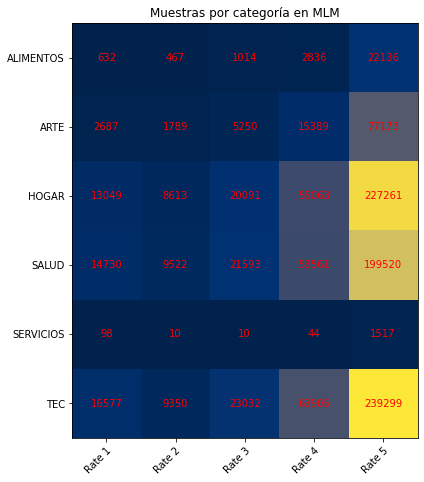

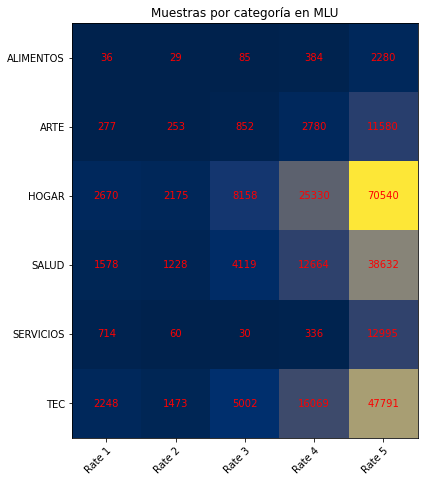

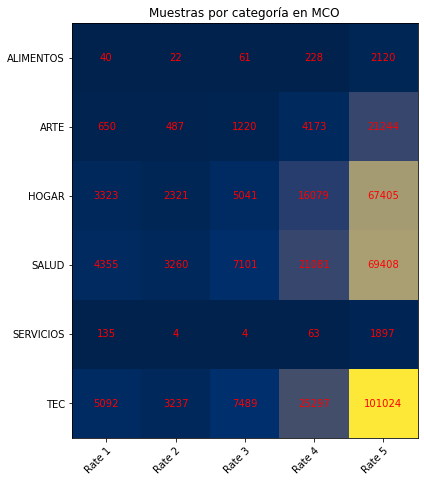

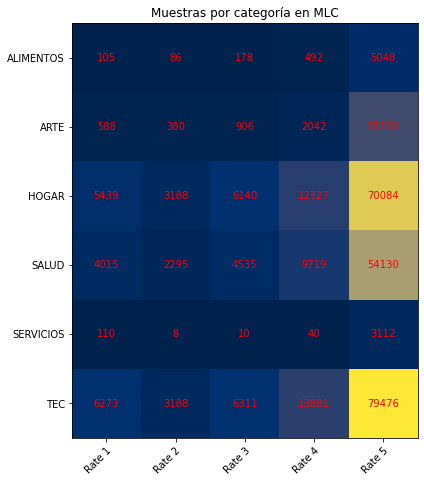

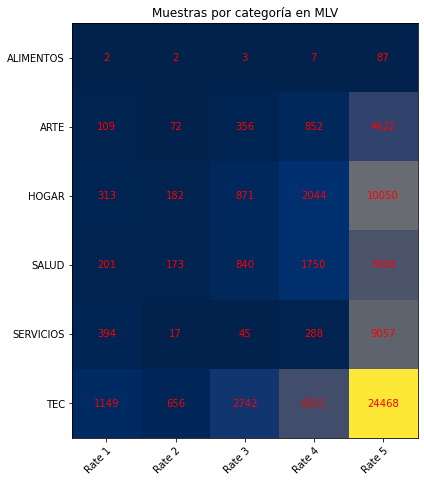

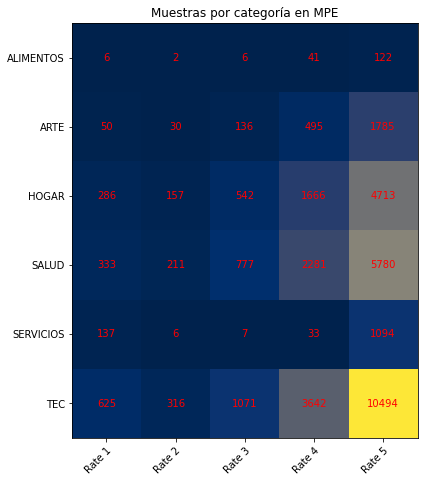

In [4]:
def plot_heatmap(matrix,countries,rates):

    fig, ax = plt.subplots(1,1,figsize=(len(countries),len(rates)+1))
    im = ax.imshow(matrix,cmap='cividis')

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(rates)))
    ax.set_yticks(np.arange(len(countries)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(['Rate {}'.format(s) for s in rates])
    ax.set_yticklabels(countries)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(countries)):
        for j in range(len(rates)):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="red")

    ax.set_title("Muestras por país y por rate")
    fig.tight_layout()
    return fig, ax

countries = ['MLB','MLA','MLM','MLU','MCO','MLC','MLV','MPE']
rates = [1, 2, 3, 4, 5]
matrix = np.zeros((len(countries),len(rates)),dtype=np.int)
for i,country in enumerate(countries):
    for j,rate in enumerate(rates):
        mymask = (df['review_rate'] == rate) & (df['country'] == country)
        matrix[i,j] = len(df[mymask])

fig, ax = plot_heatmap(matrix,countries,rates)
fig.show()


def plot_heatmap2(matrix,yticks,xticks,title):

    fig, ax = plt.subplots(1,1,figsize=(len(yticks),len(xticks)*2))
    im = ax.imshow(matrix,cmap='cividis')

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(xticks)))
    ax.set_yticks(np.arange(len(yticks)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(['Rate {}'.format(s) for s in xticks])
    ax.set_yticklabels(yticks)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(yticks)):
        for j in range(len(xticks)):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="red")

    ax.set_title(title)
    fig.tight_layout()
    return fig, ax


categories = [abbreviations[cat] for cat in sorted(list(abbreviations.keys()))]

for country in countries:
    print(country)
    matrix = np.zeros((len(categories),len(rates)),dtype=np.int)
    for i,category in enumerate(categories):
        for j,rate in enumerate(rates):
            mymask = (df['review_rate'] == rate) & (df['category'] == category) & (df['country'] == country)
            matrix[i,j] = mymask.sum()

    fig, ax = plot_heatmap2(matrix,categories,rates,title='Muestras por categoría en {}'.format(country))
    fig.show()

In [5]:
countries = ['MLB','MLA','MLM','MLU','MCO','MLC','MLV','MPE']
rates = [1, 2, 3, 4, 5]

cat2n = {'TEC': [14396,11189,9350,1473,3237,3188,656,316],
         'SERVICIOS': [4,84,10,30,4,8,17,6],
         'SALUD': [16032,11399,9522,1228,3260,2295,173,211],
         'HOGAR': [19477,16601,8613,2175,2321,3188,182,157],
         'ARTE': [4572,2710,1789,253,487,380,72,30],
         'ALIMENTOS': [386,462,467,29,22,86,2,2] 
         }


# cat2n = {'TEC': [12249,8710,7006,1356,2774,2933,602,310],
#          'SERVICIOS': [4,71,8,50,4,8,16,6],
#          'SALUD': [11831,8659,6952,1136,2867,2075,159,211],
#          'HOGAR': [15594,12865,6566,1931,2162,2857,172,156],
#          'ARTE': [3942,2351,1530,244,468,378,70,30],
#          'ALIMENTOS': [340,384,407,29,22,84,2,2] 
#          }


# cat2n = {'TEC': [14396,11199,9399,1473,3237,3188,656,316],
#          'SERVICIOS': [4,84,10,30,4,8,17,6],
#          'SALUD': [16032,11447,9534,1228,3260,2295,173,211],
#          'HOGAR': [19477,16677,8768,2175,2321,3210,182,157],
#          'ARTE': [4572,2710,1789,253,487,380,72,30],
#          'ALIMENTOS': [386,462,467,29,22,86,2,2] 
#          }

def mask(df,ctry,cat,rate):
    return ((df['country'] == ctry) & (df['category'] == cat) & (df['review_rate'] == rate))

def sample_and_get_indices(df,n):
    diff = df['review_likes'] - df['review_dislikes']
    vals = np.log(diff - diff.min() + 1)
    vals_norm = (vals - vals.min()) / (vals.max()-vals.min())
    lenghts = np.maximum(0,df['review_content'].str.len()-50)
    lenghts_norm = (lenghts - lenghts.min()) / (lenghts.max() - lenghts.min())
    df['score'] = vals_norm + .5 * lenghts_norm
    df = df.sort_values(by=['score'],ascending=False)
    return df.iloc[:n,:].index.tolist()


indices = []
for cat, n in cat2n.items():
    print('Categoría:',cat)
    for rate in rates:
        print('Rate:',rate)
        for i, country in enumerate(countries):
            print('País:',country)
            df_new = df[mask(df,country,cat,rate)]
            idx = sample_and_get_indices(df_new,n[i])
            indices.extend(idx)
            print('Cantidad de índices so far:',len(indices))
        print()
    print()

Categoría: TEC
Rate: 1
País: MLB
Cantidad de índices so far: 14396
País: MLA
Cantidad de índices so far: 25585
País: MLM
Cantidad de índices so far: 34935
País: MLU
Cantidad de índices so far: 36408
País: MCO
Cantidad de índices so far: 39645
País: MLC
Cantidad de índices so far: 42833
País: MLV
Cantidad de índices so far: 43489
País: MPE
Cantidad de índices so far: 43805

Rate: 2
País: MLB
Cantidad de índices so far: 58201
País: MLA
Cantidad de índices so far: 69390
País: MLM
Cantidad de índices so far: 78740
País: MLU
Cantidad de índices so far: 80213
País: MCO
Cantidad de índices so far: 83450
País: MLC
Cantidad de índices so far: 86638
País: MLV
Cantidad de índices so far: 87294
País: MPE
Cantidad de índices so far: 87610

Rate: 3
País: MLB
Cantidad de índices so far: 102006
País: MLA
Cantidad de índices so far: 113195
País: MLM
Cantidad de índices so far: 122545
País: MLU
Cantidad de índices so far: 124018
País: MCO
Cantidad de índices so far: 127255
País: MLC
Cantidad de índices 

In [6]:
df = df.loc[indices,:].reset_index(drop=True)

inv_abbreviations = {'HOGAR': 'Hogar / Casa',
'TEC':'Tecnología y electrónica / Tecnologia e electronica',
'ARTE':'Arte y entretenimiento / Arte e Entretenimiento',
'SALUD':'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal',
'ALIMENTOS':'Alimentos y Bebidas / Alimentos e Bebidas',
'SERVICIOS':'Servicios / Serviços'}

df['category'] = df['category'].map(inv_abbreviations)

In [7]:
print(df['review_rate'][df['country'] !='MLB'].value_counts())
print(df['review_rate'][df['country'] =='MLB'].value_counts())

5    97684
4    97684
3    97684
2    97684
1    97684
Name: review_rate, dtype: int64
5    54867
4    54867
3    54867
2    54867
1    54867
Name: review_rate, dtype: int64


In [8]:
df['prod_id'].value_counts()

MLA785340603     30
MLA865745665     30
MLA614601802     30
MLA762058223     30
MLA860468501     30
                 ..
MLU445610550      1
MCO570418767      1
MLM613181376      1
MLB1231265479     1
MLB789420589      1
Name: prod_id, Length: 270637, dtype: int64

In [9]:
df.to_csv('./reviews_all_parts_sampled_by_cat_and_limited_by_prods_08-01-2021.csv',index=False)

# Dataframe Sampleado!

In [1]:
import pandas as pd
import numpy as np
import re
import string

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./reviews_all_parts_sampled_by_cat_and_limited_by_prods_08-01-2021.csv')
df

prod_id     cat_id  review_id country  \
0       MLB1146668770   MLB10298   86011121     MLB   
1       MLB1082870096  MLB431445   67589158     MLB   
2       MLB1314436421   MLB22713   59476303     MLB   
3       MLB1019110052  MLB188914   81474226     MLB   
4        MLB690992319   MLB46692   65189956     MLB   
...               ...        ...        ...     ...   
762750   MLC533983464  MLC194331   81076623     MLC   
762751   MLV559987184  MLV122664   69392007     MLV   
762752   MLV553828524  MLV401179   55975845     MLV   
762753   MPE431150683    MPE1403   31332223     MPE   
762754   MPE429145274  MPE410886   31064131     MPE   

                                               prod_title  reviewer_id  \
0       Filamento Abs 175mm Premium - Alto Teor De Pur...     80945996   
1       Interface De Áudio Scarlett 2i2 Geração 3 - Fo...     48042674   
2       Kit Embreagem Hyundai Hb20 2014 2015 1.0 Origi...    227256199   
3       Kit 2 Filtro Refil Electrolux Purificador Pe11...      9415229   
4       Capas De Bancos Automotivos Carro Em Tecido Or...     83195905   
...                                                   ...          ...   
762750  2 Queso Mantecoso Jersey Etiqueta Roja - Fundo...     97553229   
762751                 Pirulin Chocolate Lata/envase 300g    582542641   
762752  Dulce De Leche Bufito | Galón De 5kg | Arequip...    280058698   
762753  Stevia Boliviana Natural Por Mayor Y Menor Vis...    132511912   
762754  Papel Parafinado Salchipapa Empanada Hamburgue...     88209779   

                          review_date review_status  \
0       2020-11-19T11:06:43.000-04:00     published   
1       2020-06-26T19:38:06.000-04:00     published   
2       2020-04-11T22:32:46.000-04:00     published   
3       2020-10-09T16:15:10.000-04:00     published   
4       2020-06-09T08:39:00.000-04:00     published   
...                               ...           ...   
762750  2020-10-06T11:56:06.000-04:00     published   
762751  2020-07-09T22:27:35.000-04:00     published   
762752  2020-02-14T21:25:43.000-04:00     published   
762753  2018-07-26T15:35:10.000-04:00     published   
762754  2018-07-20T13:42:37.000-04:00     published   

                                             review_title  \
0                                 Filamento inconsistente   
1                              Extremamente decepcionado.   
2                                      Péssimo pós venda    
3       Muito ruim... precisa desenvolver melhor o pro...   
4               Pior produto que comprei no ML até hoje !   
...                                                   ...   
762750         Excelente calidad, muy rico y buen precio.   
762751                                       ESPECTACULAR   
762752                                          EXCELENTE   
762753                     ESTEVIA BOLIVIANA RECOMENDABLE   
762754                                  Muy buen producto   

                                           review_content  review_rate  \
0       Filamento inconsistente, as primeiras 100g saí...            1   
1       Extremamente decepcionado. Para começo de conv...            1   
2       Não comprem este produto, eu comprei e me arre...            1   
3       Comprei o produto considerando as boas referen...            1   
4       Acabei de adquirir o seu produto e estou desap...            1   
...                                                   ...          ...   
762750  Muy rico, a todos les gustó, se nota que es de...            5   
762751  Yo soy super exigente con el pirulin, lo he co...            5   
762752  Excelente producto, larga duración , buena con...            5   
762753  Muy bueno y al alcance de los que por diversos...            5   
762754  Muy buen producto y altamente recomendable ya ...            5   

        review_likes  review_dislikes  \
0                  0                0   
1                  3               18   
2                  7                2   
3                

MLB
MLA
MLM
MLU
MCO
MLC
MLV
MPE


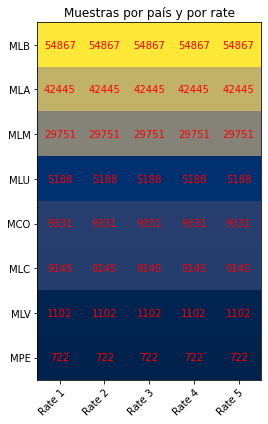

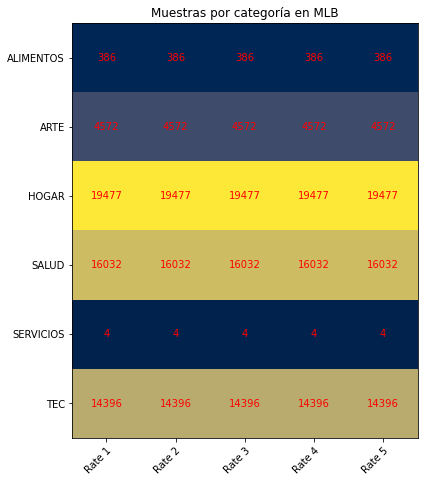

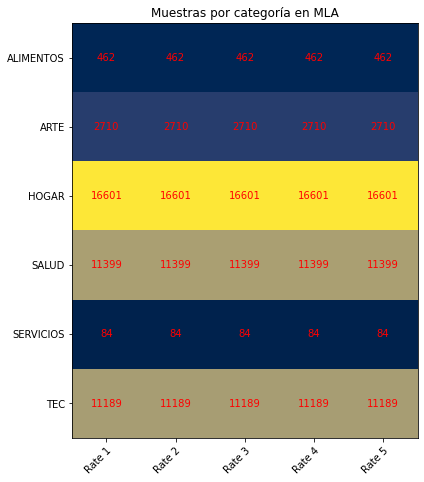

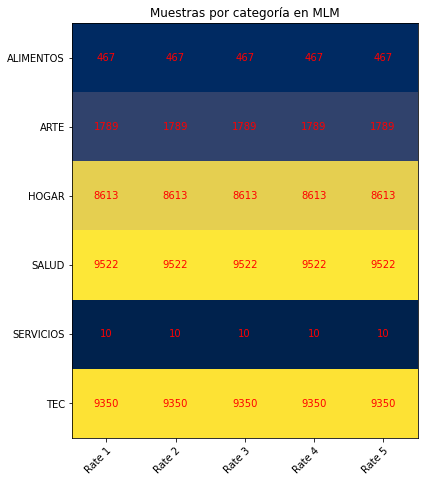

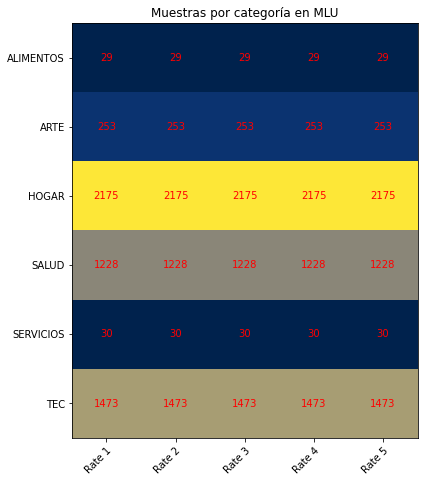

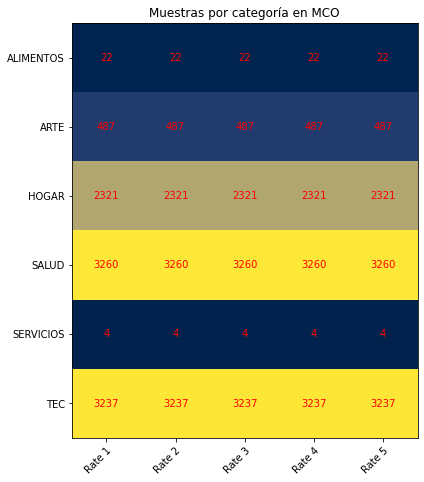

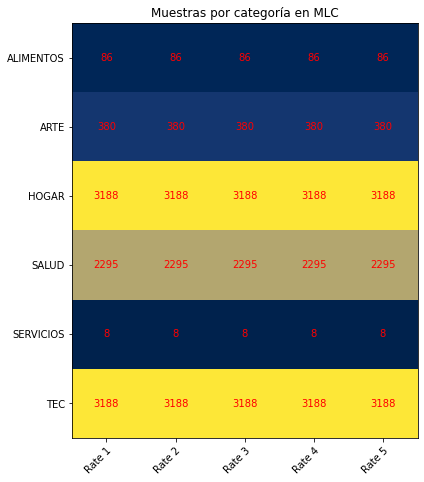

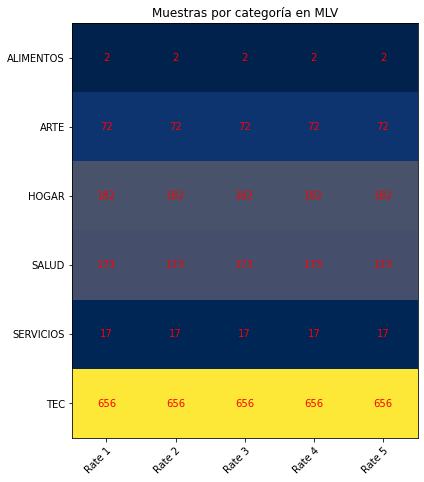

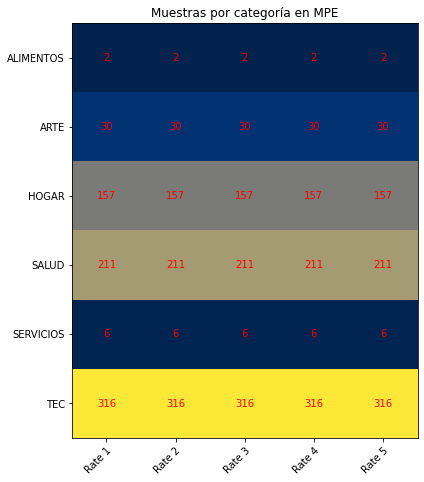

In [3]:
def plot_heatmap(matrix,countries,rates):

    fig, ax = plt.subplots(1,1,figsize=(len(countries),len(rates)+1))
    im = ax.imshow(matrix,cmap='cividis')

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(rates)))
    ax.set_yticks(np.arange(len(countries)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(['Rate {}'.format(s) for s in rates])
    ax.set_yticklabels(countries)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(countries)):
        for j in range(len(rates)):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="red")

    ax.set_title("Muestras por país y por rate")
    fig.tight_layout()
    return fig, ax

countries = ['MLB','MLA','MLM','MLU','MCO','MLC','MLV','MPE']
rates = [1, 2, 3, 4, 5]
matrix = np.zeros((len(countries),len(rates)),dtype=np.int)
for i,country in enumerate(countries):
    for j,rate in enumerate(rates):
        mymask = (df['review_rate'] == rate) & (df['country'] == country)
        matrix[i,j] = len(df[mymask])

fig, ax = plot_heatmap(matrix,countries,rates)
fig.show()


def plot_heatmap2(matrix,yticks,xticks,title):

    fig, ax = plt.subplots(1,1,figsize=(len(yticks),len(xticks)*2))
    im = ax.imshow(matrix,cmap='cividis')

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(xticks)))
    ax.set_yticks(np.arange(len(yticks)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(['Rate {}'.format(s) for s in xticks])
    ax.set_yticklabels(yticks)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(yticks)):
        for j in range(len(xticks)):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="red")

    ax.set_title(title)
    fig.tight_layout()
    return fig, ax

abbreviations = {'Hogar / Casa': 'HOGAR',
'Tecnología y electrónica / Tecnologia e electronica': 'TEC',
'Arte y entretenimiento / Arte e Entretenimiento': 'ARTE',
'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal': 'SALUD',
'Alimentos y Bebidas / Alimentos e Bebidas': 'ALIMENTOS',
'Servicios / Serviços': 'SERVICIOS'}

categories = sorted(list(abbreviations.keys()))
abbs = [abbreviations[cat] for cat in categories]

for country in countries:
    print(country)
    matrix = np.zeros((len(categories),len(rates)),dtype=np.int)
    for i,category in enumerate(categories):
        for j,rate in enumerate(rates):
            mymask = (df['review_rate'] == rate) & (df['category'] == category) & (df['country'] == country)
            matrix[i,j] = mymask.sum()

    fig, ax = plot_heatmap2(matrix,abbs,rates,title='Muestras por categoría en {}'.format(country))
    fig.show()

In [4]:
df_esp = df[df['country']!='MLB']
print(df_esp['review_rate'].value_counts())
df_por = df[df['country']=='MLB']
print(df_por['review_rate'].value_counts())

5    97684
4    97684
3    97684
2    97684
1    97684
Name: review_rate, dtype: int64
5    54867
4    54867
3    54867
2    54867
1    54867
Name: review_rate, dtype: int64


In [5]:
df_esp['prod_id'].value_counts()

MLA859449195    30
MLA769230235    30
MLA646467136    30
MLM669503150    30
MLM558355270    30
                ..
MLA771057754     1
MLA863133911     1
MCO532924944     1
MLM661048579     1
MPE436147770     1
Name: prod_id, Length: 184441, dtype: int64

In [10]:
def mask(df,ctry,rate):
    return ((df['country'] == ctry) & (df['review_rate'] == rate))

df_sub = df[mask(df,'MPE',2)].loc[:,['review_content','review_title','review_rate']]
for i, (comment, title, rate) in df_sub.iterrows():
    print(i, title)
    print(comment)
    print()

Malo
Es un mouse grande. No lo recomiendo para agarre tipo garra o de dedos. La rueda del ratón parece de juguete o de mouse barato. El sensor focus+ es bueno, pero es difícil de notar alguna diferencia con respecto a un pmw 3360 o 3389. En papel, un sensor podrá ser mejor, pero en la práctica da lo mismo. Como referencia mi mano mide 18cm x 10cm. Principalmente uso el m65 rgb elite. Le doy calificación de malo, porque la forma y el tamaño no es para mí. Para gente que esté acostumbrada al agarre de palma tal vez les resulte cómodo.

Muy blando
Buenas tardes. El soporte lumbar es un poco blando, por lo tanto cuando uno se cansa y se sienta de manera incorrecta no te obliga a corregir la postura. Para los que necesitan solo una guía que no te obligue a permanecer con la espalda doblada no hay problema, pero para los que como yo necesitan algo más firme, que no doble, que no sea blando, no sirve de mucho. Gracias.

No me satisfizo la conectividad. 
Recibí el producto conforme. Pero no ti

In [11]:
from collections import Counter

df = pd.read_csv('./reviews_all_parts_sampled_by_cat_and_limited_by_prods_08-01-2021.csv')

ds_text = df['review_title'] + ' ' + df['review_content']
chars_vocab = dict(Counter(ds_text.str.cat(sep='')))
idx = np.argsort(list(chars_vocab.values()))[::-1]
chars_vocab = {list(chars_vocab.keys())[i]:list(chars_vocab.values())[i] for i in idx}
chars_vocab

{' ': 26830759,
 'e': 15312913,
 'a': 14145698,
 'o': 12434675,
 'r': 7723332,
 's': 7540348,
 'n': 7357977,
 'i': 6885827,
 'u': 5859467,
 'l': 5735548,
 't': 5528278,
 'd': 5366426,
 'c': 5287477,
 'm': 4978268,
 'p': 3937726,
 '.': 1923598,
 'b': 1803691,
 ',': 1444013,
 'q': 1344062,
 'f': 1198853,
 'g': 1170703,
 'v': 1126306,
 'y': 1110586,
 'h': 901902,
 'á': 466455,
 'j': 419304,
 'é': 411549,
 'E': 403248,
 'ó': 401838,
 'M': 383442,
 'ã': 379671,
 'x': 357187,
 'z': 302269,
 '!': 297204,
 'í': 297054,
 'N': 237577,
 'P': 236477,
 'B': 190593,
 'L': 182443,
 'A': 171544,
 'ç': 159410,
 'S': 151412,
 '0': 137539,
 'C': 119844,
 'O': 115774,
 'ñ': 112243,
 'R': 109380,
 '1': 94976,
 'ú': 87017,
 'T': 83935,
 'D': 77591,
 '2': 71486,
 'k': 66022,
 ')': 56392,
 '(': 56098,
 'F': 55823,
 '5': 52125,
 'U': 51979,
 '3': 50300,
 'I': 45415,
 '-': 41699,
 '4': 38806,
 '"': 33503,
 'V': 31362,
 'ê': 30831,
 'H': 29211,
 'G': 27848,
 'w': 26464,
 'Y': 26224,
 '?': 25698,
 '/': 22373,
 ':

In [3]:
# def print_ds(df,pattern):
#     ds_text = df['review_title'] + ' ' + df['review_content']
#     for i, val in ds_text[ds_text.str.contains(pattern,regex=True)].items():
#         print(i, val)

# def replace_df(df,old,new):
#     ds_text = df['review_title'] + ' ' + df['review_content']
#     idx = ds_text[ds_text.str.contains(old,regex=True)].index.tolist()
#     df.loc[idx,['review_content']] = df.loc[idx,['review_content']].iloc[:,0].str.replace(old,new,regex=True)
#     return df

# def drop_df(df,pattern):
#     ds_text = df['review_title'] + ' ' + df['review_content']
#     idx = ds_text[ds_text.str.contains(pattern,regex=True)].index.tolist()
#     return df.drop(idx)

# '”“è_´ì@#&\\[ùª…]^~`¨’•²×{|–}<ä—·«>»øëå½ö‘®¬±ï÷€ß³ûþ¯î¹™ËÙæ‚ˆ£�¾ý¢¥Ö¼Ø\x08Ìµ›‹©˜šÝ‰œÏ„¤Ä'

# df = replace_df(df,'Ä','A')
# df = replace_df(df,'¤','²')
# df = replace_df(df,r'[„“”]','"')
# df = drop_df(df,'Ï')
# df = replace_df(df,r'œ','õe')
# df = drop_df(df,'‰')
# df = drop_df(df,'Ý')
# df = replace_df(df,'š','s')
# df = replace_df(df,'~a','ã')
# df = replace_df(df,'~','')
# df = replace_df(df,'.©','')
# df = replace_df(df,re.escape('‹?john?›'),'')
# df = replace_df(df,'Ì','Í')
# df = replace_df(df,'\x08','')
# df = replace_df(df,'Øtima','Ótima')
# df = replace_df(df,'Ø','')
# df = replace_df(df,'Ö aparelho','O aparelho')
# df = replace_df(df,'Öptimo','Óptimo')
# df = replace_df(df,'¥eso','y eso')
# df = drop_df(df,'¥')
# df = replace_df(df,'¢','c')
# df = replace_df(df,'ý','y')
# df = drop_df(df,re.escape('Ruim 4weasq2q22q423³3w÷@e 2de com o 333é334é ¾33w3w33w'))
# df = replace_df(df,'�','')
# df = drop_df(df,re.escape('Genial Genial. Me encanto @#$€£#:@&#€#€#**@£@£@'))
# df = replace_df(df,'ˆ','')
# df = replace_df(df,r'‚',r' , ')
# df = replace_df(df,r'Næo',r'Não')
# df = replace_df(df,r'næo',r'não')
# df = replace_df(df,r'gostæo',r'gostão')
# df = drop_df(df,re.escape('Án þess að hugsa of mikið Bókin er mjög góð, grípandi, keilusöm, sjúklega. Andlitsmynd af því sem ekki er til lengur og af þessu að það er blandaður tími fullur af flóðum með ofnæmi, óþroskaðar og óhjákvæmilegar skoðanir. Gott verð'))
# df = replace_df(df,r'Ù',r'Ú')
# df = replace_df(df,r'Ë',r'É')
# df = replace_df(df,'™',' ')
# df = replace_df(df,'î','í')
# df = drop_df(df,re.escape('Hwwtteerfrþr?? ?33fret5y4ew52etret4r er?egwkt63'))
# df = drop_df(df,"Je recommande vivement Excellent produit, complet, avec tous les accessoires nécessaires pour se raccorder au réseau d'eau existant (diamètre de robinets). Programmation très facile mais uniquement en anglais. 30 goutteurs c'est trop peu, j'aurais dû prendre une version plus étoffée. Livré à mexico en 5 jours.")
# df = replace_df(df,'û','ú')
# df = drop_df(df,re.escape('Ruim C2. Rzrvbs "?mf zß d5ßr n/. 3 v. 3.'))
# df = drop_df(df,'Muy malo Son de 4 muy malas. ßssssssssssssssssiiiiiiiii.')
# df = drop_df(df,'Bien Bien graciasáßsasasasasasssssssss.')
# df = replace_df(df,'ß','s')
# df = drop_df(df,re.escape('Una reverendisima cagada  1 estrella es mucho! una reverenda mi€rda. No coincide nada. Encima para el or#o la terminacion.'))
# df = replace_df(df,'v€nded0r','vendedor')
# df = drop_df(df,re.escape('No sirve La peor compra que hice,no sirve lo jalas y se rompe y en la maquina pues que digo una €%}^**+€.'))
# df = drop_df(df,re.escape('Ruim Zfs4r 2. ÷# dee?& s •4×??4$dsdxxas??@ 2dzd?.'))
# df = drop_df(df,'Malo Buenaaaaaaaaaaa. Bastanteeee÷eee buena.')
# df = replace_df(df,'÷ -','')
# df = replace_df(df,'al 10÷','al 10%')
# df = replace_df(df,re.escape('?÷'),'?')
# df = drop_df(df,re.escape('Ruim 4weasq2q22q423³3w÷@e 2de com o 333é334é ¾33w3w33w.'))
# df = replace_df(df,'fïcam','ficam')
# df = replace_df(df,'Pïlas','pilas')
# df = replace_df(df,'ïnfrarrojo','infrarrojo')
# df = replace_df(df,'ïphone','iphone')
# df = replace_df(df,r'ï','í')
# df = replace_df(df,r'hoje ‘','hoje ')
# df = replace_df(df,r'‘i','mi')
# df = drop_df(df,'... Produto na cor errada e não tive retorno ‘.')
# df = drop_df(df,'Bras are not a ‘one size fits most’ item of clothi Sized are incorrect. I ordered a 34 d. What i got was more of a 36 cc.')
# df = replace_df(df,r'å','a')
# df = drop_df(df,'Negativa Hola !! quiero dejar por aca mi chat de whatsapp')

'”“è_´ì@#&\\[ùª…]^~`¨’•²×{|–}<ä—·«>»øëå½ö‘®¬±ï÷€ß³ûþ¯î¹™ËÙæ‚ˆ£�¾ý¢¥Ö¼Ø\x08Ìµ›‹©˜šÝ‰œÏ„¤Ä'

In [33]:
ds = df['review_title'] + ' ' + df['review_content']
ds_tokenized = ds.str.findall(r'[^{}¡\s]+'.format(string.punctuation))
vocab = ds_tokenized.explode().value_counts()
mask = ds.str.contains('|'.join([re.escape(mystr) for mystr in vocab[vocab < 2].index.tolist()]),regex=True)
ds_new = ds[mask]

KeyboardInterrupt: 

In [ ]:
ds_new

In [14]:
rare_chars = re.escape('”ÑWº“è_´Á¿üì@Í#&Ç\\[ùª…]^~`À¨’•²×È{|Ò–}<Êä—·«>»Âøëå½ö‘ÔÕ®¬±ðÜï÷€ß³ûþ¯î¹™ËÙæ‚ˆ£�¾ý¢¥Ö¼Ø\x08Ìµ›‹©˜šÝ‰œÏ„¤Ä')
ds = df['review_title'] + ' ' + df['review_content']
df[ds.str.contains(r'[{}]+'.format(rare_chars),regex=True)]


prod_id     cat_id  review_id country  \
12      MLB1608857551   MLB45236   87248840     MLB   
53       MLB738221910  MLB120345   68757936     MLB   
74       MLB686740912  MLB243551   18704982     MLB   
102      MLB688121702    MLB3386    9047858     MLB   
107     MLB1223490339    MLB5726   43764828     MLB   
...               ...        ...        ...     ...   
762507   MLM723983129    MLM1403   58581492     MLM   
762517   MLM642895900    MLM1403   41763796     MLM   
762558   MLM732974563  MLM431254   54790096     MLM   
762625   MLU461546886    MLU1403   47110222     MLU   
762701   MLC506911902    MLC1403   57723764     MLC   

                                               prod_title  reviewer_id  \
12      Kit10 Chip Led 50w Para Reposição De Refletor ...    243416859   
53      Copo De Liquidificador Philips Walita  Ri7761 ...    520339024   
74      Par Farol Moto Milha Auxiliar Universal Led U5...    265357377   
102     Moldura 2 Din Fox Polo Golf Bora Ecosport Fies...    233083882   
107     Desumidificador Pure Ion Pro 3 Litros Relaxmed...     26198861   
...                                                   ...          ...   
762507                        Aceite De Coco Virgen 420ml    462239216   
762517  Cerveza Modelo Combo Premium Pack 12 Botellas ...    219498505   
762558  Oferta $2499 Artysan Jamón Serrano Español Tab...    461805638   
762625  Matcha Te Verde Premium 2 X 1 | 60 Grs. Envió ...     42189508   
762701  Miel De Abejas De Puerto Varas / 6 Potes / Env...    114478946   

                          review_date review_status  \
12      2020-12-01T01:27:02.000-04:00     published   
53      2020-07-05T21:17:03.000-04:00     published   
74      2017-11-28T17:06:16.000-04:00     published   
102     2017-06-22T10:54:34.000-04:00     published   
107     2019-08-01T10:04:12.000-04:00     published   
...                               ...           ...   
762507  2020-03-26T14:00:16.000-04:00     published   
762517  2019-06-12T08:27:36.000-04:00     published   
762558  2020-01-29T15:58:04.000-04:00     published   
762625  2019-10-11T11:34:39.000-04:00     published   
762701  2020-03-12T08:55:20.000-04:00     published   

                                      review_title  \
12                                       INVERDADE   
53                     Produto extremamente fraco.   
74                                      Muito ruim   
102               Não cabe no painel do fox 2011 !   
107         RETIRA POUQUÍSSIMA UMIDADE DO AMBIENTE   
...                                            ...   
762507                                   RIQUÍSIMO   
762517                                   Excelente   
762558                                   Excelente   
762625  muy bueno, y llegò enseguida la encomienda   
762701                                   BUENÍSIMA   

                                           review_content  review_rate  \
12      Especificação de 50000horas é inverdade : fora...            1   
53      O produto parece ser util, quando encaixa perf...            1   
74      Comprei um par desse farol,pensa numa porcaria...            1   
102     - a moldura não cabe no painel do fox 2011, é ...            1   
107     Primeiramente, tem um erro essencial na descri...            1   
...                                                   ...          ...   
762507  Esta espectacular este aceite de coco , huele ...            5   
762517  El producto es muy bueno. La conjunciòn de las...            5   
762558  Muy buen sabor, el soporte muy practico y el c...            5   
762625                      Buen producto …. …………………………….            5   
762701  Es muy cremosa,distinta a otras que había prob...            5   

        review_likes  review_dislikes  \
12                 0                0   
53                 0                1   
74                18                1   
102                5                1   
107               13                2   
...              ..

# Vamos a sacarle la categoría de servicios

In [3]:
import pandas as pd

df = pd.read_csv('reviews_all_parts_sampled_by_cat_and_limited_by_prods_08-01-2021.csv')
df = df[df['category'] != 'Servicios / Serviços']#.reset_index(drop=True)
df.to_csv('./reviews_all_parts_sampled_by_cat_and_limited_by_prods_09-01-2021.csv',index=False)

In [8]:
import pandas as pd
df = pd.read_csv('./reviews_all_parts_with_orig_cat_name_04-01-2021.csv')
all_categories = df.loc[:,['cat_id','category']].drop_duplicates()

In [9]:
all_categories.set_index('cat_id').to_csv('./melisa/catid2catname.csv')

In [7]:
pd.read_csv('./melisa/catid2catname.csv',index_col='cat_id').to_dict()

{'category': {'MLB10298': 'Tecnología y electrónica / Tecnologia e electronica',
  'MLB431445': 'Tecnología y electrónica / Tecnologia e electronica',
  'MLB22713': 'Tecnología y electrónica / Tecnologia e electronica',
  'MLB188914': 'Tecnología y electrónica / Tecnologia e electronica',
  'MLB46692': 'Tecnología y electrónica / Tecnologia e electronica',
  'MLB455106': 'Tecnología y electrónica / Tecnologia e electronica',
  'MLB1000': 'Tecnología y electrónica / Tecnologia e electronica',
  'MLB439249': 'Tecnología y electrónica / Tecnologia e electronica',
  'MLB11603': 'Tecnología y electrónica / Tecnologia e electronica',
  'MLB11351': 'Tecnología y electrónica / Tecnologia e electronica',
  'MLB192367': 'Tecnología y electrónica / Tecnologia e electronica',
  'MLB417704': 'Tecnología y electrónica / Tecnologia e electronica',
  'MLB45236': 'Tecnología y electrónica / Tecnologia e electronica',
  'MLB46615': 'Tecnología y electrónica / Tecnologia e electronica',
  'MLB1576': 'Tec